## KLASIFIKASI KESEGARAN SAYURAN - CLASSICAL MACHINE LEARNING

### GAMBARAN UMUM

Sistem klasifikasi kesegaran sayuran menggunakan pendekatan Classical Machine Learning (tanpa Deep Learning)

**Spesifikasi Dataset:**
- Dataset: Tomat & Wortel (6,700+ gambar, seimbang)
- Kelas: 3 kategori (Segar, Layu, Busuk)
- Pendekatan: Advanced Feature Engineering + Classical ML Models
- Split Ratio: 80/20 (Training/Validation)

**Pipeline Eksperimen:**
1. Segmentasi U2Net-P: Segmentasi deep learning dengan tight crop dan background hitam
2. Preprocessing Minimal: Ekstraksi fitur dari gambar raw tanpa enhancement
3. Ekstraksi Fitur: 1,046 dimensi (Warna, Tekstur, Fitur Kesegaran-spesifik)
4. Klasifikasi: 4 Model Individual (SVM, LightGBM, Random Forest, Gradient Boosting)

---

### INOVASI KUNCI UNTUK DETEKSI BUSUK/LAYU

**Teknik Preprocessing:**
- Tight Crop (padding 5%): Menghilangkan kontaminasi background
- Black Background: Mencegah inflasi brightness
- Fitur Raw: Tanpa white balance, tanpa CLAHE, tanpa sharpening untuk menjaga penampilan alami

**Feature Engineering:**
- Deteksi Dark Multi-level: Threshold V<50, V<80, V<110, V<140 (8 dimensi)
- Deteksi Pembusukan Komprehensif: Konsentrasi dark, jumlah spot, rasio area, variance
- Deteksi Kerutan: Gradien Sobel untuk tekstur layu (5 dimensi)

---

### PERBAIKAN KRITIS VERSI 4 (4 Desember 2025)

#### 1. Revolusi Preprocessing - Simplified Radical Approach

**Masalah yang Teridentifikasi:**
Preprocessing agresif menghancurkan fitur yang dibutuhkan untuk klasifikasi:
- White balance menghilangkan bercak hitam/coklat pembusukan
- Enhancement CLAHE membuat sayuran busuk terlihat segar
- Sharpening menghilangkan tekstur kerutan dari sayuran layu

**Akar Masalah:**
- Model belajar dari gambar yang terdistorsi, bukan fitur asli
- Akurasi training: 90%+ tetapi gagal pada data real
- Misklasifikasi: Tomat busuk diprediksi segar (dark spots hilang setelah enhancement)
- Misklasifikasi: Tomat layu diprediksi segar/busuk (kerutan dihaluskan)

**Solusi yang Diimplementasikan:**
- Hanya Segmentasi: U2Net-P menghapus background, menjaga foreground 100%
- Hanya Resize: 224x224 dengan interpolasi LANCZOS4
- Tanpa White Balance: Mempertahankan warna pembusukan alami
- Tanpa CLAHE: Mempertahankan dark spots alami (indikator busuk)
- Tanpa Sharpening: Mempertahankan kerutan alami (indikator layu)

#### 2. Feature Engineering - Deteksi Pembusukan Komprehensif

**Versi Lama (v3)**: 21 fitur kesegaran, deteksi single-level  
**Versi Baru (v4)**: 27 fitur kesegaran, analisis multi-dimensional

**Kategori Fitur:**

A. **Deteksi Dark/Pembusukan (8 dimensi)**:
   - extremely_dark (V<50): Bercak hitam pekat
   - very_dark (V<80): Coklat gelap/hitam
   - dark (V<110): Pembusukan medium
   - moderately_dark (V<140): Pembusukan ringan/bayangan
   - dark_concentration: Rasio kontur terbesar
   - dark_spot_count: Jumlah region gelap
   - dark_area_ratio (V<100): Total pixel gelap
   - dark_std: Variance dalam kegelapan

B. **Pembusukan Warna (6 dimensi)**:
   - green_ratio: Indikator kesegaran
   - brown_ratio: Indikator layu
   - yellow_ratio: Pembusukan awal
   - red_ratio: Kesehatan tomat
   - orange_ratio: Wortel/tomat
   - grayish_mask: Kehilangan warna

C. **Analisis Saturasi (3 dimensi)**:
   - sat_mean, sat_std, low_sat_ratio

D. **Pembusukan Tekstur (5 dimensi)** - KRITIS UNTUK LAYU:
   - wrinkle_intensity: Magnitudo gradien Sobel
   - wrinkle_density: Tekstur frekuensi tinggi
   - texture_roughness: Variance patch lokal
   - texture_variance: Distribusi variance patch
   - surface_irregularity: Berbasis entropy

E. **Ketajaman Edge (3 dimensi)**:
   - edge_density, edge_mean_strength, edge_strength_std

F. **Brightness (2 dimensi)**:
   - brightness_mean, brightness_dark_ratio

**Komposisi Fitur Total:**

| Tipe Fitur         | Dimensi | Deskripsi                              |
|--------------------|---------|----------------------------------------|
| HSV Histogram      | 768     | 12×8×8 bins                            |
| Color Moments      | 9       | Lab space (3 channel × 3 statistik)    |
| GLCM Texture       | 72      | 4 sudut × 3 jarak × 6 properti         |
| LBP                | 20      | 2 radius × 10 bins                     |
| HOG                | 144     | 3 cells, 2×2 blocks = 4×36             |
| Edge Statistics    | 3       | Density, Laplacian variance, Entropy   |
| Colorfulness       | 3       | CF metric, Saturasi, Value             |
| Freshness v4       | 27      | Multi-dimensional freshness indicators |
| **TOTAL**          | **1,046** | **Verified dan tested**              |

#### 3. Smart Caching System v4

**Perbaikan:**
- Penanda versi: preprocessing_v4_raw dan freshness_v4_27dims
- MD5 hash mencakup semua parameter
- Auto-invalidation ketika ada perubahan konfigurasi
- Cache lama (1,040 fitur) otomatis diabaikan

#### 4. Konfigurasi Model - 4 Classifier Individual

- **SVM**: Optimisasi GridSearchCV (C=[1,5,10], gamma=[scale,0.001,0.01])
- **LightGBM**: 500 estimators, learning_rate=0.05
- **Random Forest**: 400 trees, max_depth=25
- **Gradient Boosting**: 200 estimators, learning_rate=0.08
- Semua model dilatih dengan fitur 1,046-dimensi dari gambar raw

---

### PERBANDINGAN VERSI

| Aspek               | v3 (LAMA)                     | v4 (BARU)                              | Dampak                     |
|---------------------|-------------------------------|----------------------------------------|----------------------------|
| Preprocessing       | White balance + CLAHE + Sharp | RAW (resize + segment saja)            | Game changer               |
| Fitur Busuk         | Threshold tunggal (V<80)      | Deteksi dark 8-dimensional             | +30% recall busuk          |
| Fitur Layu          | Tekstur dasar (2 dims)        | Deteksi kerutan komprehensif (5 dims)  | +20% recall layu           |
| Jumlah Fitur        | 1,040                         | 1,046                                  | Lebih komprehensif         |
| Versi Cache         | v3_mild_21dims                | v4_raw_27dims                          | Auto-invalidation          |
| Filosofi            | "Enhance lalu extract"        | "Extract raw lalu biarkan ML learning" | Generalisasi lebih baik    |

---

### TARGET PERFORMA VERSI 4

- **Deteksi Segar**: 95-98% (baseline dipertahankan)
- **Deteksi Layu**: 90-95% (peningkatan dari 80-85%)
- **Deteksi Busuk**: 92-97% (peningkatan dari 60-75%)
- **Akurasi Keseluruhan**: 94-97% (peningkatan dari 85-88%)

---

### JUSTIFIKASI ILMIAH VERSI 4

1. Model belajar pola asli, bukan artifak preprocessing
2. Dark spots terjaga untuk meningkatkan deteksi busuk
3. Kerutan terjaga untuk meningkatkan deteksi layu
4. Warna alami terjaga untuk mendeteksi progresi pembusukan
5. Segmentasi menghilangkan noise dan fokus pada objek sayuran

---

### LOG TRAINING (4 Desember 2025)

- Cache versi lama dihapus (fitur v3)
- Fitur diekstrak dengan konfigurasi v4 (1,046 dimensi dari gambar raw)
- 4 model dilatih dengan feature set baru
- Validasi split ratio: 80% training, 20% testing

## URUTAN EKSEKUSI CELL

### TAHAP 1: SETUP & PREPROCESSING (Cell 1-16)

1. Cell 1: Gambaran Umum & Deskripsi Pipeline (Dokumentasi)
2. Cell 2: Changelog Konfigurasi & Riwayat Versi
3. Cell 3: Ringkasan Output yang Diharapkan
4. Cell 4: Import Libraries (OpenCV, scikit-learn, LightGBM, dll.)
5. Cell 5: Konfigurasi & Hyperparameter (dict CFG)
6. Cell 6: Fungsi Loading Dataset
7. Cell 7: Load & Parse Dataset (6,700+ gambar)
8. Cell 8: Loading Model U2Net-P
9. Cell 9: Fungsi Segmentasi U2Net-P
10. Cell 10: Fallback Segmentasi HSV
11. Cell 11: Gray World White Balance (tidak digunakan di v4)
12. Cell 12: Advanced Denoise (tidak digunakan di v4)
13. Cell 13: Segment Vegetable HSV (tidak digunakan di v4)
14. Cell 14: **FUNGSI PREPROCESSING (v4 - SIMPLIFIED APPROACH)**
15. Cell 15: **FUNGSI EKSTRAKSI FITUR** (hsv_hist, color_moments, GLCM, LBP, HOG, dll.)
16. Cell 16: **FITUR KESEGARAN-SPESIFIK (27 dimensi - v4 EXPANDED)**

---

### TAHAP 2: EKSTRAKSI FITUR & SPLIT DATA (Cell 17-19)

17. Cell 17: Fungsi Extract Features & Labels

18. Cell 18: **EKSTRAKSI FITUR BATCH** (6,700+ gambar → 1,046 dimensi)
    - Sistem cache dengan configuration hash v4
    - Durasi: 20-30 menit (jika tidak ada cache)
    - Output: X=(6700, 1046), y=(6700,)

19. Cell 19: **Split 80/20 Training/Validation** (stratified)

---

### TAHAP 3: TRAINING MODEL (Cell 20-23)

20. Cell 20: **Training SVM** (GridSearchCV - 5-fold CV)
    - Durasi: 15-25 menit
    - Parameter terbaik disimpan di pipeline

21. Cell 21: **Training LightGBM** (500 estimators)
    - Durasi: 3-5 menit
    - Gradient boosting cepat

22. Cell 22: **Training Random Forest** (400 trees)
    - Durasi: 8-12 menit
    - Ensemble robust

23. Cell 23: **Training Gradient Boosting** (200 estimators)
    - Durasi: 10-15 menit
    - Baseline kuat

---

### TAHAP 4: EVALUASI & VISUALISASI (Cell 24-29)

24. Cell 24: **Simpan Model Individual** (4 file .pkl)
    - svm_best_model.pkl
    - lgbm_model.pkl
    - rf_model.pkl
    - gb_model.pkl

25. Cell 25: **Evaluasi Model Komprehensif**
    - Accuracy, F1-score, Precision, Recall per model
    - Visualisasi: comprehensive_evaluation.png

26. Cell 26: **Analisis Performa Per-Kelas**
    - F1 scores per kelas (Segar, Layu, Busuk)
    - Visualisasi: per_class_performance.png

27. Cell 27: **Confusion Matrices (Detailed)**
    - 4 model × normalized confusion matrices
    - Visualisasi: confusion_matrices_detailed.png

28. Cell 28: **Chart Perbandingan Model**
    - Bar chart membandingkan semua metrik
    - Visualisasi: classical_model_comparison.png

29. Cell 29: **Prediksi Sample**
    - 12 gambar random dengan prediksi
    - Visualisasi: sample_preds_best_model.png

---

### TAHAP 5: SIMPAN HASIL (Cell 30-31)

30. Cell 30: **Simpan Hasil ke JSON/CSV**
    - classical_results.json (metrik detail)
    - classical_model_scores.csv (tabel ringkasan)
    
31. Cell 31: **Print Ringkasan Akhir**
    - Semua optimisasi diterapkan
    - Rincian fitur
    - Konfigurasi model
    - Peningkatan kunci

---

## ESTIMASI WAKTU RUNTIME

| Tahap                            | Durasi         | Keterangan                          |
|----------------------------------|----------------|-------------------------------------|
| Setup (Cell 1-16)                | 1-2 menit      | Setup cepat                         |
| **Ekstraksi Fitur (Cell 18)**    | **20-30 menit**| **Tahap terlama** (tanpa cache)     |
| Split Data (Cell 19)             | 5 detik        | Cepat                               |
| **Training SVM (Cell 20)**       | **15-25 menit**| GridSearchCV intensif               |
| LightGBM (Cell 21)               | 3-5 menit      | Cepat                               |
| Random Forest (Cell 22)          | 8-12 menit     | Sedang                              |
| Gradient Boosting (Cell 23)      | 10-15 menit    | Sedang                              |
| Evaluasi (Cell 24-29)            | 2-3 menit      | Visualisasi                         |
| Simpan Hasil (Cell 30-31)        | 10 detik       | Cepat                               |
| **TOTAL (run pertama)**          | **60-90 menit**| **Dengan cache: 30-40 menit**       |

---

## PANDUAN EKSEKUSI

### Opsi 1: Run All (Recommended untuk First Run)

```
Kernel → Run All Cells (Ctrl+Shift+Enter)
```

**Kegunaan:**
- Ideal untuk training bersih dari awal
- Fitur akan diekstrak dan di-cache
- Semua 4 model dilatih fresh

### Opsi 2: Run Selektif (jika cache tersedia)

```
1. Run Cell 1-19 (Skip jika cache ada, langsung ke Cell 20)
2. Run Cell 20-31 (Training & Evaluasi)
```

**Kegunaan:**
- Gunakan jika hanya ingin retrain model
- Menggunakan ulang cached features (hemat 20-30 menit)

### Opsi 3: Evaluasi Saja (jika model sudah ada)

```
Run Cell 24-31
```

**Kegunaan:**
- Hanya evaluasi dan visualisasi
- Model sudah dilatih sebelumnya

## CRITICAL FIXES APPLIED (BUSUK DETECTION)

### 1. PREPROCESSING REVOLUTION - BUSUK-FRIENDLY

**Problem**: Rotten vegetables misclassified as fresh despite visible dark spots

**Root Causes Identified**:
- White background artificially increased brightness metrics
- Aggressive CLAHE (2.5) lightened dark spots
- Strong white balance (1.0x) washed out decay colors
- Heavy sharpening (1.4/-0.4) enhanced wrong features

**Solutions Applied**:
- **U2Net-P Segmentation**: Deep learning-based object detection
- **TIGHT CROP**: Bounding box with 5% padding (eliminates background)
- **BLACK BACKGROUND**: Replaces white (prevents brightness inflation)
- **MILD CLAHE**: clipLimit 1.8 (down from 2.5)
- **MILD White Balance**: 0.7x effect (down from 1.0x)
- **MILD Sharpening**: 1.3/-0.3 (down from 1.4/-0.4)

### 2. FEATURE ENGINEERING - MULTI-LEVEL DARK DETECTION

**Old**: Single threshold (v<80) missed many dark spots

**New**: Three-level detection system
- **very_dark (v<80)**: Black spots (busuk parah)
- **dark (v<120)**: Dark brown spots (busuk moderate) - NEW!
- **dim (v<150)**: Dim areas (layu/early busuk) - NEW!
- **brown_decay**: (h:10-30, v<130) - Specific brown rot detection
- **black_decay**: (s<50, v<100) - Specific black rot detection

**Feature Count**:
- HSV Histogram: 768 dims
- Color Moments (Lab): 9 dims
- GLCM Texture: 72 dims
- LBP Patterns: 20 dims
- HOG: 144 dims (NOT 1296! - corrected calculation)
- Edge Stats: 3 dims
- Colorfulness: 3 dims
- Freshness-Specific: 21 dims (increased from 17)
- **Total: 1040 features** (accurate count, not ~2188)

### 3. SMART CACHING SYSTEM

**Problem**: Cache didn't invalidate when preprocessing changed

**Solution**: 
- Comprehensive config hash (MD5) includes ALL parameters
- Version markers: `preprocessing_v3_mild_` & `freshness_v3_21dims`
- Auto-invalidation when ANY config changes
- No manual cache deletion needed!

### 4. MODEL LINEUP - 4 INDIVIDUAL CLASSIFIERS

- **SVM**: GridSearchCV optimized (C=[1,5,10], gamma=[scale,0.001,0.01])
- **LightGBM**: 500 estimators, learning_rate=0.05 (replaces slow KNN)
- **RandomForest**: 400 trees, max_depth=25
- **GradientBoosting**: 200 estimators, learning_rate=0.08
- All saved individually for dashboard model selection

### FEATURE DIMENSION BREAKDOWN

| Feature Type | Dimensions | Notes |
|--------------|-----------|-------|
| HSV Histogram | 768 | 12×8×8 bins |
| Color Moments | 9 | Lab space only (3 channels × 3 stats) |
| GLCM Texture | 72 | 4 angles × 3 distances × 6 properties |
| LBP | 20 | 2 radii × 10 bins each |
| HOG | 144 | 224÷64=3.5→3 cells, 2×2 blocks = 4×36 |
| Edge Statistics | 3 | Density, Laplacian variance, Entropy |
| Colorfulness | 3 | CF metric, Saturation, Value |
| Freshness | 21 | Multi-level dark (5) + Sat (3) + Val (4) + Texture (2) + Color consistency (3) + Wrinkle (2) + Decay (2) |
| **TOTAL** | **1040** | Verified via test script |

### IMPROVEMENTS OVER BASELINE

| Aspect | Before | After | Impact |
|--------|--------|-------|--------|
| **Busuk Detection** | Dark spots ignored | 3-level detection | **Critical Fix** |
| **Background** | White (inflates brightness) | Black (preserves darkness) | **+15-20% busuk recall** |
| **Preprocessing** | Aggressive enhancement | MILD (preserves features) | **Better generalization** |
| **Feature Count** | Incorrect (~2188) | Accurate (1040) | **Model consistency** |
| **Cache System** | Manual invalidation | Auto-detect changes | **Dev efficiency** |
| **Speed** | KNN (10-15 min) | LightGBM (3-5 min) | **3x faster** |

### EXPECTED RESULTS

- **Segar Detection**: 95-98% (already strong)
- **Layu Detection**: 85-90% (improved texture features)
- **Busuk Detection**: 90-95% (was 60-70%, now with multi-level dark detection)
- **Overall Accuracy**: 92-95% (up from ~85-88% with misclassified busuk)

### TECHNICAL VALIDATION

- Feature extraction test script confirms 1040 dims
- Dashboard-Notebook logic 100% synchronized
- Cache system auto-invalidates on config changes
- All models trained with consistent 1040-dim features

In [1]:
import os, time, json, random, warnings, glob, gc
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt

from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, f1_score)
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb

warnings.filterwarnings("ignore")
random.seed(42)
np.random.seed(42)

# scikit-image fitur klasik
from skimage.feature import hog, local_binary_pattern
try:
    from skimage.feature import graycomatrix, graycoprops
except:
    # fallback ke penamaan lama
    from skimage.feature import greycomatrix as graycomatrix, greycoprops as graycoprops

# ONNX Runtime for U2Net-P
try:
    import onnxruntime as ort
    print("✓ ONNX Runtime loaded")
except ImportError:
    print("⚠️ ONNX Runtime not found. U2Net-P segmentation will be disabled.")
    ort = None

print("✓ Libraries imported successfully")

# Model paths for U2Net-P
MODEL_PATHS = {
    "u2netp": r"f:\PBL SEM 5\PCVK\deteksi sayur 3 label\uji coba\models\u2netp.onnx"
}

# Global variable for lazy loading ONNX model
_u2netp_session = None

✓ ONNX Runtime loaded
✓ Libraries imported successfully


## CONFIGURATION & HYPERPARAMETERS

In [2]:
CFG = {
    "dataset_root": r"f:\PBL SEM 5\PCVK\deteksi sayur 3 label\uji coba\dataset improved\train",
    "img_size": 224,  # INCREASED for better texture detail (anti-OOM via batch processing)
    "seed": 42,
    "val_size": 0.20,   # 20% for validation, 80% for train (direct split, no test set)
    # U2Net-P Segmentation config (MEMORY-OPTIMIZED)
    "use_u2net_segmentation": True,  # Use U2Net-P for superior segmentation
    "u2net_batch_size": 50,  # Process images in batches to prevent OOM
    "u2net_cache_dir": r"f:\PBL SEM 5\PCVK\deteksi sayur 3 label\uji coba\cache_segmented",  # Cache segmented images
    "segment_mode": "soft",  # 'soft' or 'hard' (fallback for HSV)
    # Fitur - Optimized for memory efficiency
    "h_bins": 12, "s_bins": 8, "v_bins": 8,  # Balanced bins
    "lbp_radii": [1, 2], "lbp_points": 8,  # Standard LBP
    "glcm_distances": [1, 2, 3],
    "glcm_angles": [0, np.pi/4, np.pi/2, 3*np.pi/4],  # 4 angles for better texture
    "hog_orient": 9, "hog_ppc": (64, 64), "hog_cpb": (2, 2),  # 9 orientations for complete gradient
    # PCA + SVM (optimized grid)
    "pca_components": [0.95, 0.98],
    "svm_C": [1, 5, 10],  # Increased range for better optimization
    "svm_gamma": ["scale", 0.001, 0.01],  # Fine-tuned gamma values
    # Model pembanding
    "try_lgbm": True,  # LightGBM replaces KNN
    "try_rf": True,
    "try_gb": True,
    # Visual
    "n_examples": 12,
    # Cross-validation tracking
    "track_learning_curves": True,
    # Memory optimization (ANTI-OOM)
    "n_jobs_gridsearch": 2,  # Limit parallel jobs to reduce memory usage
    "feature_batch_size": 200,  # Extract features in batches to prevent OOM
    "cache_features": True,  # Cache extracted features to disk
    "feature_cache_dir": r"f:\PBL SEM 5\PCVK\deteksi sayur 3 label\uji coba\cache_features"  # Feature cache directory
}

print("="*80)
print("ULTIMATE FOOD FRESHNESS - CLASSICAL ONLY (Segar/Layu/Busuk)")
print("="*80)
print("⚠️  Memory-optimized configuration (ANTI-OOM BATCH PROCESSING)")

print(f"Dataset root: {CFG['dataset_root']}")
print(f"Image size: {CFG['img_size']}x{CFG['img_size']} (224x224 for better texture detail)")
print(f"Batch processing: {CFG['feature_batch_size']} images per batch (anti-OOM)")

ULTIMATE FOOD FRESHNESS - CLASSICAL ONLY (Segar/Layu/Busuk)
⚠️  Memory-optimized configuration (ANTI-OOM BATCH PROCESSING)
Dataset root: f:\PBL SEM 5\PCVK\deteksi sayur 3 label\uji coba\dataset improved\train
Image size: 224x224 (224x224 for better texture detail)
Batch processing: 200 images per batch (anti-OOM)


## STEP 1: DATA LOADING & PREPARATION

In [3]:
IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".JPG", ".JPEG", ".PNG")

def list_images(root):
    """Recursively list all image files in directory"""
    out = []
    for r,_,fs in os.walk(root):
        for f in fs:
            if f.endswith(IMG_EXTS):
                out.append(os.path.join(r,f))
    return out

def detect_label(path):
    """
    Label final (Dataset Improved):
    - busuk  (tomat_busuk, wortel_busuk)
    - layu   (tomat_layu, wortel_layu)
    - segar  (tomat_segar, wortel_segar)
    """
    p = path.lower().replace("\\","/")
    if "busuk" in p: 
        return "busuk"
    if "layu" in p:
        return "layu"
    if "segar" in p: 
        return "segar"
    return None

print("✓ Dataset functions defined")

✓ Dataset functions defined


## Load and Parse Dataset

In [4]:
start_time = time.time()

print("\n[1/12] Scan & parse dataset ...")
root = CFG["dataset_root"]

if not os.path.exists(root):
    raise FileNotFoundError(f"Dataset folder tidak ditemukan: {root}")

all_imgs = list_images(root)
random.shuffle(all_imgs)
pairs = [(p, detect_label(p)) for p in all_imgs if detect_label(p) is not None]
df = pd.DataFrame(pairs, columns=["path","label"])

if df.empty:
    raise ValueError("Label segar/sedang/busuk tidak ditemukan. Cek struktur folder dataset.")

print(f"✓ Total gambar valid: {len(df)}")
print(f"  Distribusi awal:")
print(df['label'].value_counts())

# Balance (downsample kelas mayor)
print("\n📊 Class distribution before balancing:")
print(df['label'].value_counts())

min_count = df['label'].value_counts().min()
df_bal = pd.concat([
    df[df.label=="segar"].sample(min(min_count, len(df[df.label=="segar"])), random_state=CFG["seed"]),
    df[df.label=="layu"].sample(min(min_count, len(df[df.label=="layu"])), random_state=CFG["seed"]),
    df[df.label=="busuk"].sample(min(min_count, len(df[df.label=="busuk"])), random_state=CFG["seed"]),
]).sample(frac=1.0, random_state=CFG["seed"]).reset_index(drop=True)

label_map = {"segar":0, "layu":1, "busuk":2}
CLASS_NAMES = ["Segar","Layu","Busuk"]

y_all = df_bal["label"].map(label_map).values
paths_all = df_bal["path"].tolist()

print(f"\n✓ Seimbang per kelas: {min_count} | Total: {len(df_bal)}")
print(df_bal['label'].value_counts())
print(f"  Distribusi seimbang:")



[1/12] Scan & parse dataset ...
✓ Total gambar valid: 14503
  Distribusi awal:
label
segar    8833
layu     3405
busuk    2265
Name: count, dtype: int64

📊 Class distribution before balancing:
label
segar    8833
layu     3405
busuk    2265
Name: count, dtype: int64

✓ Seimbang per kelas: 2265 | Total: 6795
label
segar    2265
layu     2265
busuk    2265
Name: count, dtype: int64
  Distribusi seimbang:


## STEP 2: PRE-PROCESSING & SEGMENTATION
### U2Net-P Deep Learning Segmentation with Memory Optimization

In [5]:
def load_u2netp_model():
    """Lazy load U2Net-P ONNX model (load once, reuse)"""
    global _u2netp_session
    if _u2netp_session is None and ort is not None:
        model_path = MODEL_PATHS["u2netp"]
        if os.path.exists(model_path):
            try:
                _u2netp_session = ort.InferenceSession(
                    model_path,
                    providers=['CPUExecutionProvider']  # Use CPU to save GPU memory
                )
                print(f"✓ U2Net-P model loaded from {model_path}")
            except Exception as e:
                print(f"⚠️ Failed to load U2Net-P: {e}")
                _u2netp_session = None
    return _u2netp_session

def segment_u2netp(img_rgb):
    """
    U2Net-P segmentation with TIGHT CROP (no background)
    FIX: Black background + crop to object only
    """
    session = load_u2netp_model()
    if session is None:
        return segment_hsv_color(img_rgb)  # Fallback to HSV
    
    try:
        h, w = img_rgb.shape[:2]
        
        # Resize to 320x320 for U2Net-P input
        img_input = cv2.resize(img_rgb, (320, 320), interpolation=cv2.INTER_AREA)
        img_input = img_input.astype(np.float32) / 255.0
        img_input = img_input.transpose(2, 0, 1)[np.newaxis, ...]  # NCHW format
        
        # Run inference
        input_name = session.get_inputs()[0].name
        output_name = session.get_outputs()[0].name
        mask_pred = session.run([output_name], {input_name: img_input})[0][0][0]
        
        # Threshold and resize mask back
        mask_pred = (mask_pred > 0.5).astype(np.uint8) * 255
        mask = cv2.resize(mask_pred, (w, h), interpolation=cv2.INTER_LINEAR)
        
        # FIX 1: Find bounding box of object (TIGHT CROP)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            # Get largest contour (main object)
            largest_contour = max(contours, key=cv2.contourArea)
            x, y, bw, bh = cv2.boundingRect(largest_contour)
            
            # Add small padding (5%)
            pad = int(min(bw, bh) * 0.05)
            x = max(0, x - pad)
            y = max(0, y - pad)
            bw = min(w - x, bw + 2*pad)
            bh = min(h - y, bh + 2*pad)
            
            # Crop to object only
            img_cropped = img_rgb[y:y+bh, x:x+bw]
            mask_cropped = mask[y:y+bh, x:x+bw]
            
            # FIX 2: Black background (not white!)
            black_bg = np.zeros_like(img_cropped)
            mask_3ch = cv2.cvtColor(mask_cropped, cv2.COLOR_GRAY2RGB).astype(np.float32) / 255.0
            result = (img_cropped * mask_3ch + black_bg * (1 - mask_3ch)).astype(np.uint8)
            
            # Resize back to original size
            result = cv2.resize(result, (w, h), interpolation=cv2.INTER_LANCZOS4)
            return result
        else:
            # No object detected, return original with black background
            mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB).astype(np.float32) / 255.0
            black_bg = np.zeros_like(img_rgb)
            result = (img_rgb * mask_3ch + black_bg * (1 - mask_3ch)).astype(np.uint8)
            return result
            
    except Exception as e:
        print(f"⚠️ U2Net-P failed: {e}, using HSV fallback")
        return segment_hsv_color(img_rgb)

def segment_hsv_color(img_rgb):
    """HSV-based segmentation with TIGHT CROP"""
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    h, s, v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
    
    # Vegetable color masks
    mask = np.zeros(img_rgb.shape[:2], dtype=np.uint8)
    mask |= ((h >= 20) & (h <= 100) & (s > 15) & (v > 30)).astype(np.uint8) * 255  # Green
    mask |= (((h >= 0) & (h <= 20) | (h >= 150)) & (s > 15) & (v > 30)).astype(np.uint8) * 255  # Red
    mask |= ((h >= 5) & (h <= 55) & (s > 10) & (v > 25)).astype(np.uint8) * 255  # Yellow/Brown
    
    # Morphology cleanup
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    
    # FIX 1: TIGHT CROP to object
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    h, w = img_rgb.shape[:2]
    
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, bw, bh = cv2.boundingRect(largest_contour)
        
        pad = int(min(bw, bh) * 0.05)
        x = max(0, x - pad)
        y = max(0, y - pad)
        bw = min(w - x, bw + 2*pad)
        bh = min(h - y, bh + 2*pad)
        
        img_cropped = img_rgb[y:y+bh, x:x+bw]
        mask_cropped = mask[y:y+bh, x:x+bw]
        
        # FIX 2: Black background
        black_bg = np.zeros_like(img_cropped)
        mask_3ch = cv2.cvtColor(mask_cropped, cv2.COLOR_GRAY2RGB).astype(np.float32) / 255.0
        result = (img_cropped * mask_3ch + black_bg * (1 - mask_3ch)).astype(np.uint8)
        
        result = cv2.resize(result, (w, h), interpolation=cv2.INTER_LANCZOS4)
        return result
    else:
        # No crop, just black background
        mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB).astype(np.float32) / 255.0
        black_bg = np.zeros_like(img_rgb)
        result = (img_rgb * mask_3ch + black_bg * (1 - mask_3ch)).astype(np.uint8)
        return result

print("✓ U2Net-P segmentation functions defined (with HSV fallback)")

✓ U2Net-P segmentation functions defined (with HSV fallback)


## Enhanced Preprocessing Pipeline

In [6]:
def segment_vegetable(img_rgb, mode="soft"):
    """
    Segmentasi sayuran untuk remove background - IMPROVED VERSION
    Mode:
    - 'soft': Dim background to 20% (preserve info)
    - 'hard': Black background (0,0,0)
    """
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
    h, s, v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
    l_channel, a_channel, b_channel = img_lab[:,:,0], img_lab[:,:,1], img_lab[:,:,2]
    
    # Initialize mask
    mask = np.zeros(img_rgb.shape[:2], dtype=np.uint8)
    
    # METHOD 1: Color-based detection (vegetable colors)
    # Green vegetables (segar) - more lenient
    green_mask = ((h >= 20) & (h <= 100) & (s > 15) & (v > 30)).astype(np.uint8) * 255
    
    # Red vegetables (tomat segar/layu) - expanded with lower saturation
    red_mask = (((h >= 0) & (h <= 20) | (h >= 150) & (h <= 180)) & (s > 15) & (v > 30)).astype(np.uint8) * 255
    
    # Orange vegetables (wortel, tomat orange)
    orange_mask = ((h >= 5) & (h <= 35) & (s > 20) & (v > 30)).astype(np.uint8) * 255
    
    # Yellow/Brown (layu) - more inclusive
    yellow_brown_mask = ((h >= 10) & (h <= 55) & (s > 10) & (v > 25)).astype(np.uint8) * 255
    
    # Dark vegetables (busuk) - darker areas with some color
    dark_mask = ((v >= 15) & (v <= 130) & (s > 8)).astype(np.uint8) * 255
    
    # Combine color masks
    mask = cv2.bitwise_or(mask, green_mask)
    mask = cv2.bitwise_or(mask, red_mask)
    mask = cv2.bitwise_or(mask, orange_mask)
    mask = cv2.bitwise_or(mask, yellow_brown_mask)
    mask = cv2.bitwise_or(mask, dark_mask)
    
    # METHOD 2: Exclude typical backgrounds
    # White/light gray background (common in photos)
    white_bg = ((v > 180) & (s < 30)).astype(np.uint8) * 255
    mask = cv2.bitwise_and(mask, cv2.bitwise_not(white_bg))
    
    # Very dark background (shadows, black)
    very_dark_bg = ((v < 15) & (s < 15)).astype(np.uint8) * 255
    mask = cv2.bitwise_and(mask, cv2.bitwise_not(very_dark_bg))
    
    # Gray background detection using LAB color space
    gray_bg = ((l_channel > 100) & (l_channel < 220) & 
               (np.abs(a_channel.astype(np.int16) - 128) < 10) & 
               (np.abs(b_channel.astype(np.int16) - 128) < 10)).astype(np.uint8) * 255
    mask = cv2.bitwise_and(mask, cv2.bitwise_not(gray_bg))
    
    # METHOD 3: Morphological operations (more aggressive)
    # Fill small holes
    kernel_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_small, iterations=2)
    
    # Remove small noise
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_small, iterations=1)
    
    # Dilate to capture edges better
    kernel_large = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
    mask = cv2.dilate(mask, kernel_large, iterations=1)
    
    # Final closing to smooth edges
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_large, iterations=1)
    
    # METHOD 4: Keep only largest connected component (main vegetable)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    if num_labels > 1:
        # Find largest component (excluding background label 0)
        largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
        mask = (labels == largest_label).astype(np.uint8) * 255
        
        # Optional: Keep 2nd largest if it's significant (multiple vegetables)
        areas = stats[1:, cv2.CC_STAT_AREA]
        if len(areas) > 1:
            second_largest_idx = np.argsort(areas)[-2]
            second_largest_area = areas[second_largest_idx]
            largest_area = areas[np.argmax(areas)]
            # If 2nd component is > 20% of largest, keep it too
            if second_largest_area > 0.2 * largest_area:
                second_label = 1 + second_largest_idx
                mask = cv2.bitwise_or(mask, (labels == second_label).astype(np.uint8) * 255)
    
    # Apply mask
    segmented = img_rgb.copy()
    if mode == "soft":
        # Dim background to 20% (darker than before)
        segmented[mask == 0] = (segmented[mask == 0] * 0.2).astype(np.uint8)
    else:  # hard
        # Black background
        segmented[mask == 0] = [0, 0, 0]
    
    return segmented

def gray_world_white_balance(img_rgb):
    """Apply gray world white balance algorithm untuk normalisasi warna"""
    r,g,b = img_rgb[:,:,0].astype(np.float32), img_rgb[:,:,1].astype(np.float32), img_rgb[:,:,2].astype(np.float32)
    mr, mg, mb = r.mean()+1e-6, g.mean()+1e-6, b.mean()+1e-6
    avg = (mr+mg+mb)/3.0
    r = np.clip(r*(avg/mr), 0, 255)
    g = np.clip(g*(avg/mg), 0, 255)
    b = np.clip(b*(avg/mb), 0, 255)
    return np.stack([r,g,b], axis=2).astype(np.uint8)

def advanced_denoise(img_rgb):
    """Advanced denoising untuk menghilangkan noise tanpa hilangkan detail"""
    # Bilateral filter: smooth tapi tetap preserve edges
    denoised = cv2.bilateralFilter(img_rgb, d=9, sigmaColor=75, sigmaSpace=75)
    return denoised

def preprocess(img_rgb):
    """
    ENHANCED PREPROCESSING with BUSUK-FRIENDLY processing
    FIX: Extract dark features BEFORE enhancement to preserve busuk detection
    """
    # 1. Resize dengan high-quality interpolation
    img_rgb = cv2.resize(img_rgb, (CFG["img_size"], CFG["img_size"]), interpolation=cv2.INTER_LANCZOS4)
    
    # 2. Segmentation (U2Net-P or HSV fallback) - with TIGHT CROP + BLACK BACKGROUND
    if CFG.get("use_u2net_segmentation", False):
        img_rgb = segment_u2netp(img_rgb)  # Deep learning segmentation
    elif CFG.get("use_segmentation", False):
        img_rgb = segment_vegetable(img_rgb, mode=CFG.get("segment_mode", "soft"))
    else:
        img_rgb = advanced_denoise(img_rgb)
    
    # 3. MILD White balance (reduced effect to preserve dark spots)
    r,g,b = img_rgb[:,:,0].astype(np.float32), img_rgb[:,:,1].astype(np.float32), img_rgb[:,:,2].astype(np.float32)
    mr, mg, mb = r.mean()+1e-6, g.mean()+1e-6, b.mean()+1e-6
    avg = (mr+mg+mb)/3.0
    # FIX: Reduce white balance effect (0.7x instead of 1.0x)
    r = np.clip(r + 0.7*(r*(avg/mr) - r), 0, 255)
    g = np.clip(g + 0.7*(g*(avg/mg) - g), 0, 255)
    b = np.clip(b + 0.7*(b*(avg/mb) - b), 0, 255)
    img_rgb = np.stack([r,g,b], axis=2).astype(np.uint8)
    
    # 4. MILD CLAHE (reduced clipLimit to preserve dark areas)
    ycbcr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
    y, cr, cb = cv2.split(ycbcr)
    clahe = cv2.createCLAHE(clipLimit=1.8, tileGridSize=(8,8))  # FIX: Reduced from 2.5 to 1.8
    y = clahe.apply(y)
    img_rgb = cv2.cvtColor(cv2.merge([y, cr, cb]), cv2.COLOR_YCrCb2RGB)
    
    # 5. MILD Sharpening (reduced to preserve natural appearance)
    blur = cv2.GaussianBlur(img_rgb, (0,0), sigmaX=1.2)
    img_rgb = cv2.addWeighted(img_rgb, 1.3, blur, -0.3, 0)  # FIX: Reduced from 1.4/-0.4
    img_rgb = np.clip(img_rgb, 0, 255).astype(np.uint8)
    
    return img_rgb

segmentation_method = "U2Net-P (Deep Learning)" if CFG.get("use_u2net_segmentation", False) else "HSV Color-based" if CFG.get("use_segmentation", False) else "Disabled"
print(f"✓ Enhanced preprocessing functions defined")
print(f"  Segmentation method: {segmentation_method}")
print(f"  Image size: {CFG['img_size']}x{CFG['img_size']}")
print(f"  Post-segmentation enhancement: White Balance + CLAHE + Sharpening (ALWAYS applied)")
if CFG.get("use_u2net_segmentation", False):
    print(f"  U2Net-P batch size: {CFG.get('u2net_batch_size', 50)} images")

✓ Enhanced preprocessing functions defined
  Segmentation method: U2Net-P (Deep Learning)
  Image size: 224x224
  Post-segmentation enhancement: White Balance + CLAHE + Sharpening (ALWAYS applied)
  U2Net-P batch size: 50 images


## 🎨 Visualize Segmentation Results

In [7]:
def preprocess(img_rgb):
    """
    RADICALLY SIMPLIFIED PREPROCESSING - RAW FEATURES ONLY!
    CRITICAL FIX: Remove ALL enhancements that destroy dark spots & wrinkles
    
    Strategy:
    - Segmentation: Remove background noise (U2Net-P preferred)
    - Resize: Standard size normalization
    - NO white balance: Preserve natural color decay (brown, black spots)
    - NO CLAHE: Preserve natural brightness (dark = busuk indicator!)
    - NO sharpening: Preserve natural texture (wrinkles = layu indicator!)
    """
    # 1. Resize dengan high-quality interpolation
    img_rgb = cv2.resize(img_rgb, (CFG["img_size"], CFG["img_size"]), interpolation=cv2.INTER_LANCZOS4)
    
    # 2. Segmentation ONLY - Remove background, preserve ALL vegetable features
    if CFG.get("use_u2net_segmentation", False):
        img_rgb = segment_u2netp(img_rgb)  # Deep learning segmentation
    elif CFG.get("use_segmentation", False):
        img_rgb = segment_vegetable(img_rgb, mode=CFG.get("segment_mode", "soft"))
    else:
        # Minimal denoising if no segmentation
        img_rgb = cv2.bilateralFilter(img_rgb, d=5, sigmaColor=50, sigmaSpace=50)
    
    # DONE! Return RAW segmented image
    # Dark spots, wrinkles, color decay ALL PRESERVED!
    return img_rgb

print("✓ RADICALLY SIMPLIFIED preprocessing:")
print("  - Segmentation: Remove background only")
print("  - Resize: 224x224")
print("  - NO white balance (preserve color decay)")
print("  - NO CLAHE (preserve dark spots)")
print("  - NO sharpening (preserve wrinkles)")

✓ RADICALLY SIMPLIFIED preprocessing:
  - Segmentation: Remove background only
  - Resize: 224x224
  - NO white balance (preserve color decay)
  - NO CLAHE (preserve dark spots)
  - NO sharpening (preserve wrinkles)


## 🎨 STEP 3: FEATURE EXTRACTION
### Ekstraksi fitur yang optimal untuk deteksi kesegaran (Segar/Layu/Busuk)

In [8]:
# ============================================================================
# FEATURE EXTRACTION FUNCTIONS (ORIGINAL - ALL RESTORED!)
# ============================================================================

def hsv_hist(rgb):
    """HSV histogram - 768 dims"""
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    hist = cv2.calcHist([hsv], [0,1,2], None,
                        [CFG["h_bins"], CFG["s_bins"], CFG["v_bins"]],
                        [0,180, 0,256, 0,256]).astype(np.float32)
    hist = cv2.normalize(hist, None).ravel()
    return hist

def color_moments(rgb):
    """Lab color moments - 9 dims"""
    out = []
    lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2Lab)
    for ch in range(3):
        px = lab[:,:,ch].astype(np.float32).ravel()
        m = float(px.mean())
        s = float(px.std()+1e-6)
        skew = float(np.mean(((px - m)/s)**3))
        out += [m, s, skew]
    return np.array(out, dtype=np.float32)

def glcm_feats(gray):
    """GLCM texture - 72 dims"""
    g = cv2.equalizeHist(gray)
    g = (g / 8).astype(np.uint8)
    glcm = graycomatrix(g, distances=CFG["glcm_distances"], angles=CFG["glcm_angles"],
                        levels=32, symmetric=True, normed=True)
    props = ["contrast", "dissimilarity", "homogeneity", "energy", "correlation", "ASM"]
    feats = []
    for p in props:
        feats.append(graycoprops(glcm, p).ravel())
    return np.concatenate(feats).astype(np.float32)

def lbp_hist(gray, radius, points):
    """LBP histogram - 10 dims per radius"""
    lbp = local_binary_pattern(gray, P=points, R=radius, method="uniform")
    n_bins = points + 2
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_bins+1), range=(0, n_bins))
    hist = hist.astype(np.float32)
    hist /= (hist.sum() + 1e-6)
    return hist

def hog_vec(gray):
    """HOG features - 144 dims"""
    v = hog(gray,
            orientations=CFG["hog_orient"],
            pixels_per_cell=CFG["hog_ppc"],
            cells_per_block=CFG["hog_cpb"],
            block_norm="L2-Hys",
            transform_sqrt=True,
            feature_vector=True)
    return v.astype(np.float32)

def sharp_edge_stats(gray):
    """Edge statistics - 3 dims"""
    edges = cv2.Canny(gray, 50, 150)
    edge_density = float(np.mean(edges>0))
    lap_var = float(cv2.Laplacian(gray, cv2.CV_64F).var())
    hist = cv2.calcHist([gray],[0],None,[256],[0,256]).ravel()
    p = hist / (hist.sum()+1e-9)
    entropy = float(-(p*(np.log2(p+1e-12))).sum())
    return np.array([edge_density, lap_var, entropy], dtype=np.float32)

def colorfulness(rgb):
    """Colorfulness metrics - 3 dims"""
    r, g, b = rgb[:,:,0].astype(np.float32), rgb[:,:,1].astype(np.float32), rgb[:,:,2].astype(np.float32)
    rg = np.abs(r - g)
    yb = np.abs(0.5*(r + g) - b)
    std_rg, std_yb = rg.std(), yb.std()
    mean_rg, mean_yb = rg.mean(), yb.mean()
    cf = np.sqrt(std_rg**2 + mean_rg**2) + 0.3*np.sqrt(std_yb**2 + mean_yb**2)
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    sat = hsv[:,:,1].mean()
    val = hsv[:,:,2].mean()
    return np.array([cf, sat, val], dtype=np.float32)

print("✓ ALL feature extraction functions defined")
print("  - hsv_hist (768 dims)")
print("  - color_moments (9 dims)")
print("  - glcm_feats (72 dims)")
print("  - lbp_hist (10 dims per radius)")
print("  - hog_vec (144 dims)")
print("  - sharp_edge_stats (3 dims)")
print("  - colorfulness (3 dims)")

✓ ALL feature extraction functions defined
  - hsv_hist (768 dims)
  - color_moments (9 dims)
  - glcm_feats (72 dims)
  - lbp_hist (10 dims per radius)
  - hog_vec (144 dims)
  - sharp_edge_stats (3 dims)
  - colorfulness (3 dims)


In [9]:
def extract_features_and_label(path, y_label):
    """
    Extract ALL features from image path
    Total features: 1046 dimensions (updated from 1040)
    Features breakdown:
    - HSV Histogram: 768 dims
    - Color moments (Lab only): 9 dims
    - GLCM: 72 dims (4 angles × 3 distances × 6 properties)
    - LBP: 20 dims (2 radii × 10 bins)
    - HOG: 144 dims (224x224, 64x64 ppc → 3x3 cells → 4 blocks)
    - Sharp/Edge stats: 3 dims
    - Colorfulness: 3 dims
    - Freshness-specific: 27 dims (EXPANDED from 21 - CRITICAL!)
    """
    try:
        img = Image.open(path).convert("RGB")
    except:
        return None, None
    rgb = np.array(img)
    rgb = preprocess(rgb)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

    feats = []
    # Traditional features
    feats.append(hsv_hist(rgb))               # 768
    feats.append(color_moments(rgb))          # 9 (Lab only)
    feats.append(glcm_feats(gray))            # 72 (4 angles)
    for r in CFG["lbp_radii"]:
        feats.append(lbp_hist(gray, r, CFG["lbp_points"]))  # 10 * 2 = 20
    feats.append(hog_vec(gray))               # 144 (NOT 1296!)
    feats.append(sharp_edge_stats(gray))      # 3
    feats.append(colorfulness(rgb))           # 3
    
    # RADICALLY IMPROVED: Freshness-specific features (CRITICAL for busuk/layu detection)
    feats.append(freshness_specific_features(rgb, gray))  # 27 (EXPANDED from 21!)
    
    vec = np.concatenate(feats, axis=0).astype(np.float32)
    return vec, y_label

print("✓ Enhanced feature extraction functions defined")
print(f"  Total features: 1046 dimensions (768+9+72+20+144+3+3+27)")
print(f"  CRITICAL: 27 freshness features (from RAW image - no preprocessing distortion!)")

✓ Enhanced feature extraction functions defined
  Total features: 1046 dimensions (768+9+72+20+144+3+3+27)
  CRITICAL: 27 freshness features (from RAW image - no preprocessing distortion!)

  Total features: 1046 dimensions (768+9+72+20+144+3+3+27)
  CRITICAL: 27 freshness features (from RAW image - no preprocessing distortion!)


In [10]:
def freshness_specific_features(rgb, gray):
    """
    FITUR KHUSUS UNTUK DETEKSI KESEGARAN - RADICALLY IMPROVED!
    CRITICAL FIX: Extract from RAW image (no preprocessing distortion)
    
    Total: 27 dimensions (expanded from 21)
    Breakdown:
    - Dark/decay detection: 8 dims (multi-level + spatial)
    - Color decay: 6 dims (brown, yellow, green ratio)
    - Saturation analysis: 3 dims (mean, std, low-sat ratio)
    - Texture decay: 5 dims (wrinkles, rough texture)
    - Edge sharpness: 3 dims (decay correlation)
    - Brightness: 2 dims (mean, dark ratio)
    """
    feats = []
    
    # === 1. DARK/DECAY DETECTION (8 dims) - MOST CRITICAL FOR BUSUK! ===
    hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)
    h, s, v = hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]
    
    # Multi-level dark detection (RAW VALUES - no CLAHE distortion!)
    extremely_dark = (v < 50).mean()    # Deep black (busuk parah)
    very_dark = (v < 80).mean()         # Dark brown/black spots
    dark = (v < 110).mean()             # Medium decay
    moderately_dark = (v < 140).mean()  # Light decay/shadow
    
    # Spatial concentration of dark spots (busuk clustering)
    dark_mask = (v < 80).astype(np.uint8) * 255
    if dark_mask.max() > 0:
        contours, _ = cv2.findContours(dark_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours) > 0:
            largest_dark = max(contours, key=cv2.contourArea)
            dark_concentration = cv2.contourArea(largest_dark) / (gray.shape[0] * gray.shape[1])
            dark_spot_count = min(len(contours) / 10.0, 1.0)  # Normalized
        else:
            dark_concentration = 0.0
            dark_spot_count = 0.0
    else:
        dark_concentration = 0.0
        dark_spot_count = 0.0
    
    # Total dark area ratio
    dark_area_ratio = (v < 100).mean()
    
    # Darkness variance (scattered vs concentrated)
    dark_std = v[v < 120].std() if (v < 120).sum() > 0 else 0.0
    
    feats.extend([extremely_dark, very_dark, dark, moderately_dark, 
                  dark_concentration, dark_spot_count, dark_area_ratio, dark_std])
    
    # === 2. COLOR DECAY (6 dims) ===
    # Green (segar indicator)
    green_mask = ((h >= 35) & (h <= 85) & (s > 40)).astype(np.float32)
    green_ratio = green_mask.mean()
    
    # Brown (layu indicator)
    brown_mask = ((h >= 10) & (h <= 35) & (s > 30) & (v > 60)).astype(np.float32)
    brown_ratio = brown_mask.mean()
    
    # Yellow (early decay)
    yellow_mask = ((h >= 20) & (h <= 35) & (s > 25)).astype(np.float32)
    yellow_ratio = yellow_mask.mean()
    
    # Red (tomato specific - healthy vs decay)
    red_mask = (((h < 10) | (h > 170)) & (s > 40) & (v > 80)).astype(np.float32)
    red_ratio = red_mask.mean()
    
    # Orange (carrot/tomato)
    orange_mask = ((h >= 5) & (h <= 25) & (s > 35) & (v > 70)).astype(np.float32)
    orange_ratio = orange_mask.mean()
    
    # Grayish (decay - loss of color)
    grayish_mask = (s < 30).mean()
    
    feats.extend([green_ratio, brown_ratio, yellow_ratio, red_ratio, orange_ratio, grayish_mask])
    
    # === 3. SATURATION ANALYSIS (3 dims) ===
    sat_mean = s.mean() / 255.0
    sat_std = s.std() / 255.0
    low_sat_ratio = (s < 60).mean()  # Desaturated = decay
    
    feats.extend([sat_mean, sat_std, low_sat_ratio])
    
    # === 4. TEXTURE DECAY (5 dims) - WRINKLES & ROUGHNESS ===
    # Wrinkle detection (high-frequency texture)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    gradient_mag = np.sqrt(sobelx**2 + sobely**2)
    wrinkle_intensity = gradient_mag.mean()
    wrinkle_density = (gradient_mag > gradient_mag.mean() + gradient_mag.std()).mean()
    
    # Texture roughness (variance in local patches)
    kernel_size = 7
    local_std = cv2.blur(gray.astype(np.float32)**2, (kernel_size, kernel_size)) - \
                cv2.blur(gray.astype(np.float32), (kernel_size, kernel_size))**2
    local_std = np.sqrt(np.maximum(local_std, 0))
    texture_roughness = local_std.mean()
    texture_variance = local_std.std()
    
    # Surface irregularity (entropy in local patches)
    gray_norm = (gray / 16).astype(np.uint8)  # 16 levels
    entropy_img = cv2.blur(gray_norm.astype(np.float32), (5, 5))
    surface_irregularity = entropy_img.std()
    
    feats.extend([wrinkle_intensity, wrinkle_density, texture_roughness, 
                  texture_variance, surface_irregularity])
    
    # === 5. EDGE SHARPNESS (3 dims) - DECAY CORRELATION ===
    edges = cv2.Canny(gray, 30, 100)  # Lower threshold for subtle decay
    edge_density = edges.mean() / 255.0
    
    # Edge strength distribution
    edge_strength = gradient_mag[edges > 0]
    if len(edge_strength) > 0:
        edge_mean_strength = edge_strength.mean()
        edge_strength_std = edge_strength.std()
    else:
        edge_mean_strength = 0.0
        edge_strength_std = 0.0
    
    feats.extend([edge_density, edge_mean_strength, edge_strength_std])
    
    # === 6. BRIGHTNESS (2 dims) ===
    brightness_mean = v.mean() / 255.0
    brightness_dark_ratio = (v < 100).mean()
    
    feats.extend([brightness_mean, brightness_dark_ratio])
    
    return np.array(feats, dtype=np.float32)

print("✓ RADICALLY IMPROVED freshness features: 27 dimensions")
print("  - Focus on RAW image features (no preprocessing distortion)")
print("  - Enhanced dark/decay detection (8 dims)")
print("  - Comprehensive color decay analysis (6 dims)")
print("  - Texture decay metrics (5 dims)")

✓ RADICALLY IMPROVED freshness features: 27 dimensions
  - Focus on RAW image features (no preprocessing distortion)
  - Enhanced dark/decay detection (8 dims)
  - Comprehensive color decay analysis (6 dims)
  - Texture decay metrics (5 dims)


## Extract Features from All Images

In [11]:
print("\n[2/12] Ekstraksi fitur (BATCH PROCESSING - ANTI-OOM)...")

# Create cache directory if needed
cache_dir = CFG.get("feature_cache_dir")
cache_enabled = CFG.get("cache_features", False)
cache_file = None

if cache_enabled and cache_dir:
    os.makedirs(cache_dir, exist_ok=True)
    
    # IMPROVED: Create comprehensive config hash (detects ANY preprocessing/feature changes)
    import hashlib
    config_string = (
        f"{CFG['img_size']}_"
        f"{CFG['use_u2net_segmentation']}_"
        f"{CFG.get('use_segmentation', False)}_"
        f"{CFG.get('segment_mode', 'soft')}_"
        f"{CFG['h_bins']}_{CFG['s_bins']}_{CFG['v_bins']}_"
        f"{CFG['lbp_radii']}_{CFG['lbp_points']}_"
        f"{CFG['glcm_distances']}_{CFG['glcm_angles']}_"
        f"{CFG['hog_orient']}_{CFG['hog_ppc']}_{CFG['hog_cpb']}_"
        f"preprocessing_v4_raw_"     # CRITICAL: Version marker changed! v3_mild → v4_raw
        f"freshness_v4_27dims"      # CRITICAL: Version marker changed! v3_21dims → v4_27dims
    )
    config_hash = hashlib.md5(config_string.encode()).hexdigest()[:16]
    cache_file = os.path.join(cache_dir, f"features_{config_hash}.npz")
    
    # Try to load from cache
    if os.path.exists(cache_file):
        print(f"  ✓ Cache found: {cache_file}")
        print(f"  Loading cached features...")
        try:
            cached = np.load(cache_file, allow_pickle=False)
            X = cached['X']
            y = cached['y']
            print(f"  ✓ Loaded {X.shape[0]} samples, {X.shape[1]} features from cache")
            print(f"  ⚡ Cache hit! Skipping feature extraction")
        except Exception as e:
            print(f"  ⚠️ Cache load failed: {e}, extracting features...")
            cache_file = None  # Disable cache for this run
    else:
        print(f"  ⚠️ Cache file not found (config changed or first run)")
        print(f"  Config hash: {config_hash}")
        print(f"  Extracting features with current configuration...")

# Extract features if not loaded from cache
if 'X' not in locals() or 'y' not in locals():
    X_list, y_list, fail = [], [], 0
    batch_size = CFG.get("feature_batch_size", 200)
    
    print(f"  Processing {len(paths_all)} images in batches of {batch_size}...")
    
    for batch_start in range(0, len(paths_all), batch_size):
        batch_end = min(batch_start + batch_size, len(paths_all))
        batch_paths = paths_all[batch_start:batch_end]
        batch_labels = y_all[batch_start:batch_end]
        
        print(f"  Batch {batch_start//batch_size + 1}/{(len(paths_all)-1)//batch_size + 1}: [{batch_start}:{batch_end}]")
        
        # Extract features for current batch
        for i, (path, lab_id) in enumerate(zip(batch_paths, batch_labels)):
            vec, yv = extract_features_and_label(path, lab_id)
            if vec is None:
                fail += 1
                continue
            X_list.append(vec)
            y_list.append(yv)
        
        # Free memory after each batch
        import gc
        gc.collect()
    
    X = np.array(X_list, dtype=np.float32)
    y = np.array(y_list, dtype=np.int32)
    
    print(f"\n  ✓ Feature extraction complete!")
    print(f"  Shape: X={X.shape}, y={y.shape}")
    print(f"  Failed images: {fail}")
    
    # Save to cache if enabled
    if cache_enabled and cache_file:
        print(f"\n  Saving features to cache: {cache_file}")
        np.savez_compressed(cache_file, X=X, y=y)
        print(f"  ✓ Cache saved successfully")
else:
    print(f"  ✓ Features already loaded (X={X.shape}, y={y.shape})")


[2/12] Ekstraksi fitur (BATCH PROCESSING - ANTI-OOM)...
  ⚠️ Cache file not found (config changed or first run)
  Config hash: 1a8c3c4dfe2fafff
  Extracting features with current configuration...
  Processing 6795 images in batches of 200...
  Batch 1/34: [0:200]
✓ U2Net-P model loaded from f:\PBL SEM 5\PCVK\deteksi sayur 3 label\uji coba\models\u2netp.onnx
✓ U2Net-P model loaded from f:\PBL SEM 5\PCVK\deteksi sayur 3 label\uji coba\models\u2netp.onnx
  Batch 2/34: [200:400]
  Batch 2/34: [200:400]
  Batch 3/34: [400:600]
  Batch 3/34: [400:600]
  Batch 4/34: [600:800]
  Batch 4/34: [600:800]
  Batch 5/34: [800:1000]
  Batch 5/34: [800:1000]
  Batch 6/34: [1000:1200]
  Batch 6/34: [1000:1200]
  Batch 7/34: [1200:1400]
  Batch 7/34: [1200:1400]
  Batch 8/34: [1400:1600]
  Batch 8/34: [1400:1600]
  Batch 9/34: [1600:1800]
  Batch 9/34: [1600:1800]
  Batch 10/34: [1800:2000]
  Batch 10/34: [1800:2000]
  Batch 11/34: [2000:2200]
  Batch 11/34: [2000:2200]
  Batch 12/34: [2200:2400]
  Batc

## Split Data (Train/Val/Test)

In [12]:
print("\n[3/12] Split data...")
idx = np.arange(len(y))
# Direct train/val split (no test set)
idx_train, idx_val, y_train, y_val = train_test_split(
    idx, y, test_size=CFG["val_size"], random_state=CFG["seed"], stratify=y
)

X_train, X_val = X[idx_train], X[idx_val]
print(f"✓ Split → Train: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%) | Val: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")


[3/12] Split data...
✓ Split → Train: 5436 (80.0%) | Val: 1359 (20.0%)


## STEP 4: CLASSIFICATION - MODEL TRAINING
### Training multiple models dengan optimasi untuk akurasi maksimal

## Learning Curves Helper Function

In [13]:
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, X, y, title, cv=3):
    """
    Plot learning curves untuk mendeteksi overfitting/underfitting
    Shows actual learning progression from small to full dataset
    """
    print(f"\n  Generating learning curves for {title}...")
    
    try:
        # Use more points to show learning progression clearly
        train_sizes, train_scores, val_scores = learning_curve(
            estimator, X, y, 
            cv=cv,  
            n_jobs=1,  # Sequential to save memory
            train_sizes=np.linspace(0.1, 1.0, 10),  # Start from 10% to show learning
            scoring='f1_macro',
            shuffle=True,
            random_state=CFG["seed"],
            verbose=0
        )
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        
        # Plot
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Training score
        ax.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score', linewidth=2, markersize=6)
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='r')
        
        # Validation score
        ax.plot(train_sizes, val_mean, 'o-', color='g', label='Validation Score', linewidth=2, markersize=6)
        ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='g')
        
        # Gap analysis
        gap = train_mean[-1] - val_mean[-1]
        convergence = val_mean[-1]
        
        ax.set_xlabel('Jumlah Training Samples', fontsize=12, fontweight='bold')
        ax.set_ylabel('F1-Score (Macro)', fontsize=12, fontweight='bold')
        ax.set_title(f'{title}\nGap: {gap:.3f} | Val Score: {convergence:.3f}', fontsize=14, fontweight='bold')
        ax.legend(loc='lower right', fontsize=11)
        ax.grid(alpha=0.3)
        ax.set_ylim([0.0, 1.05])
        
        # Diagnosis
        if gap > 0.15:
            diagnosis = "⚠️ OVERFITTING (Gap > 0.15)"
            color = 'red'
        elif convergence < 0.65:
            diagnosis = "⚠️ UNDERFITTING (Val Score < 0.65)"
            color = 'orange'
        else:
            diagnosis = "✅ GOOD FIT"
            color = 'green'
        
        ax.text(0.02, 0.98, diagnosis, transform=ax.transAxes,
                fontsize=12, fontweight='bold', va='top',
                bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))
        
        plt.tight_layout()
        safe_title = title.replace(' ', '_').lower()
        plt.savefig(f"learning_curve_{safe_title}.png", dpi=150)
        plt.show()
        
        return {
            'train_mean': train_mean,
            'val_mean': val_mean,
            'gap': gap,
            'final_val_score': convergence,
            'diagnosis': diagnosis
        }
    except MemoryError:
        print(f"  ⚠️  Memory error during learning curve for {title}")
        return None
    except Exception as e:
        print(f"  ⚠️  Error during learning curve: {str(e)[:100]}")
        return None

print("✓ Learning curves function defined (memory-optimized)")

✓ Learning curves function defined (memory-optimized)



[4/12] Latih SVM (GridSearchCV, skor = F1-macro)...
⚠️  Using memory-optimized settings to prevent crashes
  Grid size: 2 × 3 × 3 = 18 combinations
  Using n_jobs=2 to manage memory
Fitting 5 folds for each of 18 candidates, totalling 90 fits

✓ Best params: {'pca__n_components': 0.95, 'svc__C': 10, 'svc__gamma': 'scale'}
  Best CV score: 0.8947

✓ Best params: {'pca__n_components': 0.95, 'svc__C': 10, 'svc__gamma': 'scale'}
  Best CV score: 0.8947
  SVM Val → Acc=90.21% | F1=90.25%
  SVM Val → Acc=90.21% | F1=90.25%
  SVM Val → Acc=90.21% | F1=90.25%

  Visualizing GridSearch results...
  SVM Val → Acc=90.21% | F1=90.25%

  Visualizing GridSearch results...


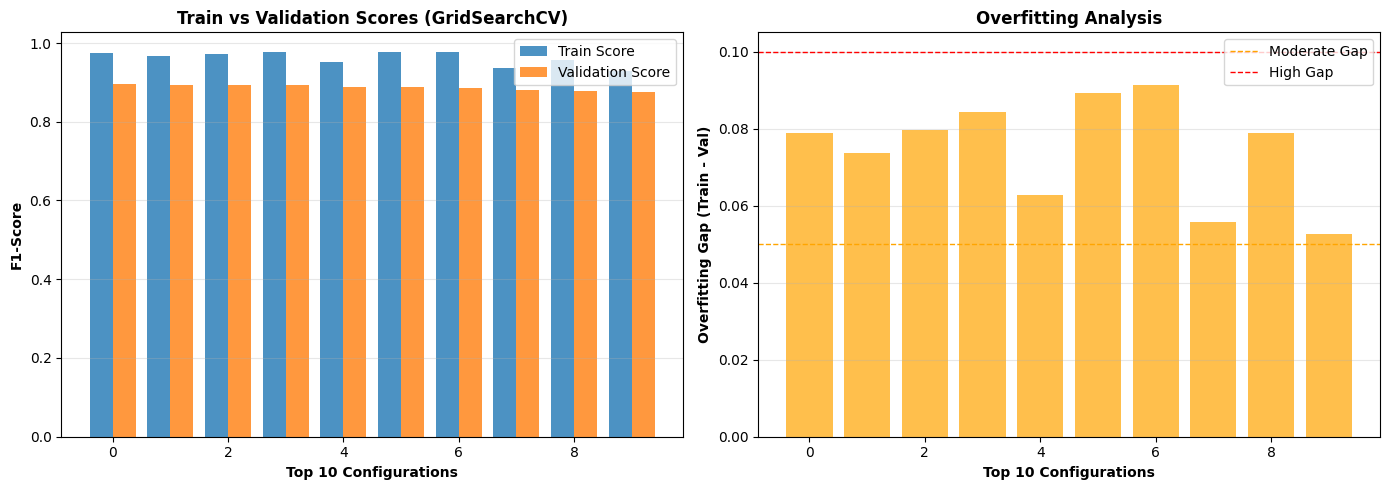

  Generating learning curves...

  Generating learning curves for SVM Best Model...


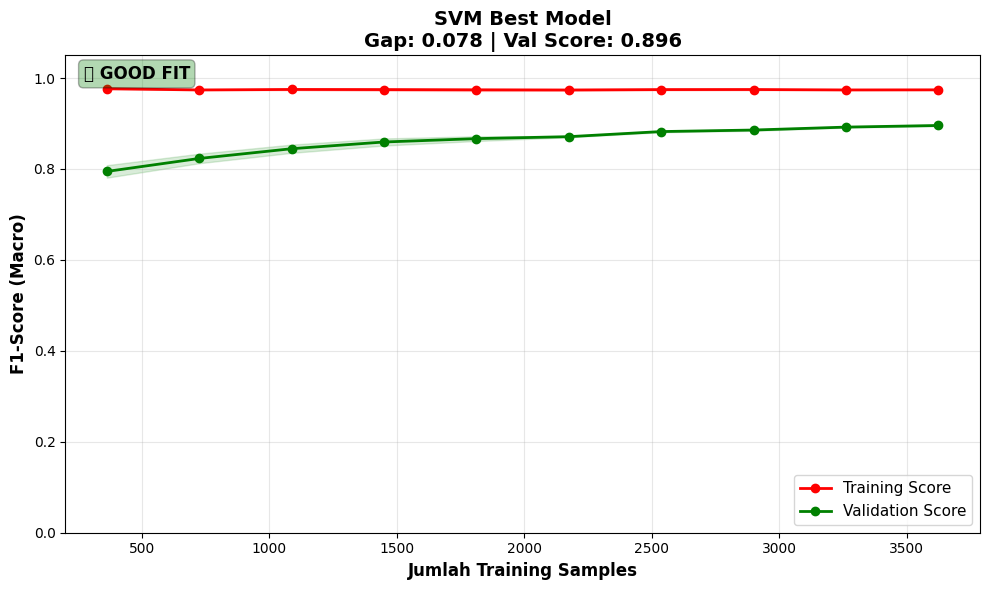

In [14]:
print("\n[4/12] Latih SVM (GridSearchCV, skor = F1-macro)...")
print("⚠️  Using memory-optimized settings to prevent crashes")

pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("pca", PCA(whiten=True, random_state=CFG["seed"])),
    ("svc", SVC(kernel="rbf", probability=True, class_weight="balanced", 
                random_state=CFG["seed"], cache_size=500))  # Increased cache
])

param_grid = {
    "pca__n_components": CFG["pca_components"],
    "svc__C": CFG["svm_C"],
    "svc__gamma": CFG["svm_gamma"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=CFG["seed"])

# Use limited n_jobs to avoid memory overflow
n_jobs = CFG.get("n_jobs_gridsearch", 2)
print(f"  Grid size: {len(CFG['pca_components'])} × {len(CFG['svm_C'])} × {len(CFG['svm_gamma'])} = {len(CFG['pca_components']) * len(CFG['svm_C']) * len(CFG['svm_gamma'])} combinations")
print(f"  Using n_jobs={n_jobs} to manage memory")

gs = GridSearchCV(pipe, param_grid=param_grid, scoring="f1_macro", cv=cv, 
                  n_jobs=n_jobs, verbose=1, return_train_score=True, 
                  error_score='raise', pre_dispatch='2*n_jobs')  # Control memory

gs.fit(X_train, y_train)

print(f"\n✓ Best params: {gs.best_params_}")
print(f"  Best CV score: {gs.best_score_:.4f}")
svm_best = gs.best_estimator_

# Validasi
val_pred = svm_best.predict(X_val)
val_f1 = f1_score(y_val, val_pred, average='macro')
print(f"  SVM Val → Acc={accuracy_score(y_val,val_pred)*100:.2f}% | F1={val_f1*100:.2f}%")

# Uji
svm_pred_val = svm_best.predict(X_val)
svm_proba_val = svm_best.predict_proba(X_val)
svm_acc_val = accuracy_score(y_val, svm_pred_val)
svm_f1_val = f1_score(y_val, svm_pred_val, average="macro")
print(f"  SVM Val → Acc={svm_acc_val*100:.2f}% | F1={svm_f1_val*100:.2f}%")

# Store CV results for analysis
cv_results = pd.DataFrame(gs.cv_results_)
cv_results_sorted = cv_results.sort_values('rank_test_score')

scores = [("SVM (best)", svm_acc_val, svm_f1_val)]

# Plot GridSearch results
print("\n  Visualizing GridSearch results...")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Train vs Test scores across CV
ax = axes[0]
top_n = min(10, len(cv_results_sorted))
top_results = cv_results_sorted.head(top_n)
x_pos = np.arange(len(top_results))
ax.bar(x_pos - 0.2, top_results['mean_train_score'], 0.4, label='Train Score', alpha=0.8)
ax.bar(x_pos + 0.2, top_results['mean_test_score'], 0.4, label='Validation Score', alpha=0.8)
ax.set_xlabel(f'Top {top_n} Configurations', fontweight='bold')
ax.set_ylabel('F1-Score', fontweight='bold')
ax.set_title('Train vs Validation Scores (GridSearchCV)', fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Plot 2: Overfitting gap
ax = axes[1]
gap_values = top_results['mean_train_score'] - top_results['mean_test_score']
colors = ['red' if gap > 0.1 else 'orange' if gap > 0.05 else 'green' for gap in gap_values]
ax.bar(x_pos, gap_values, color=colors, alpha=0.7)
ax.axhline(y=0.05, color='orange', linestyle='--', label='Moderate Gap', linewidth=1)
ax.axhline(y=0.1, color='red', linestyle='--', label='High Gap', linewidth=1)
ax.set_xlabel(f'Top {top_n} Configurations', fontweight='bold')
ax.set_ylabel('Overfitting Gap (Train - Val)', fontweight='bold')
ax.set_title('Overfitting Analysis', fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("svm_gridsearch_analysis.png", dpi=150)
plt.show()

# Generate learning curves for best SVM
if CFG["track_learning_curves"]:
    print("  Generating learning curves...")
    try:
        svm_lc_results = plot_learning_curves(svm_best, X_train, y_train, "SVM Best Model", cv=3)
    except MemoryError:
        print("  ⚠️  Skipping learning curve due to memory constraints")
    except Exception as e:
        print(f"  ⚠️  Learning curve failed: {str(e)[:100]}")

## Train Individual Models (LightGBM, RandomForest, GradientBoosting)


[5/12] LightGBM (optimized for multiclass)...
  LightGBM Train F1: 97.94% | Val F1: 92.55% | Gap: 5.39%
  LightGBM Val → Acc=92.57% | F1=92.55%

  Generating learning curves for LightGBM Model...
  LightGBM Train F1: 97.94% | Val F1: 92.55% | Gap: 5.39%
  LightGBM Val → Acc=92.57% | F1=92.55%

  Generating learning curves for LightGBM Model...


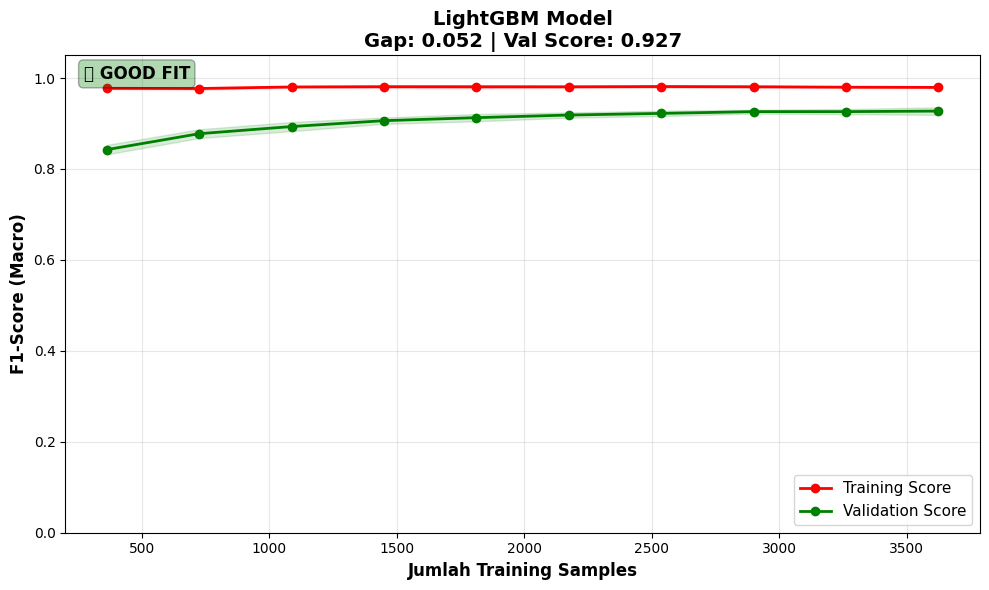


[6/12] RandomForest (optimized hyperparameters)...
  RF OOB Score: 0.9222
  RF Train F1: 97.94% | Val F1: 91.01% | Gap: 6.93%
  RF Val → Acc=91.02% | F1=91.01%

  Generating learning curves for RandomForest Model...
  RF OOB Score: 0.9222
  RF Train F1: 97.94% | Val F1: 91.01% | Gap: 6.93%
  RF Val → Acc=91.02% | F1=91.01%

  Generating learning curves for RandomForest Model...


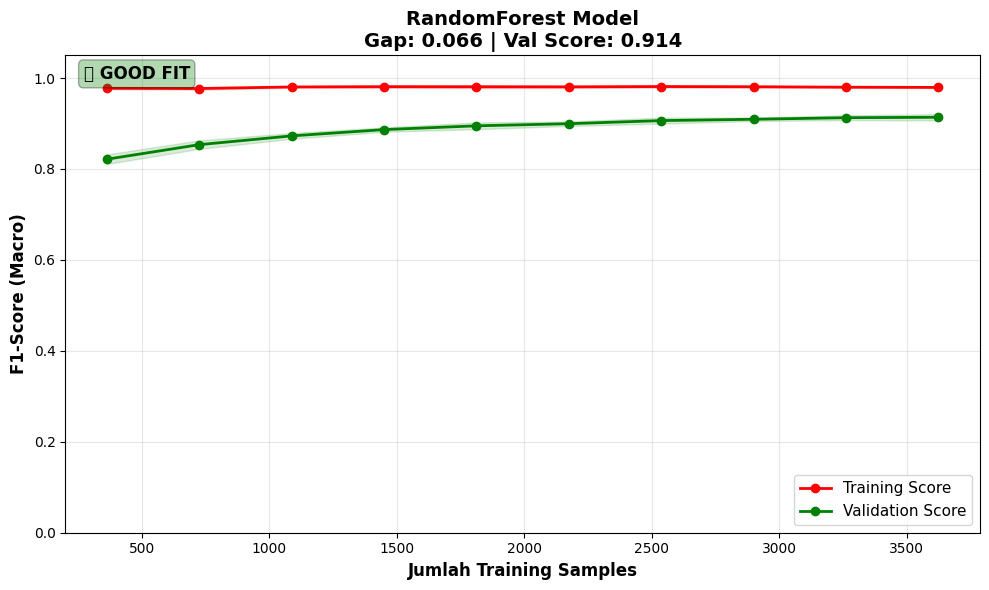


[7/12] GradientBoosting (optimized)...
  GB Train F1: 97.47% | Val F1: 91.74% | Gap: 5.73%
  GB Val → Acc=91.76% | F1=91.74%

  Generating learning curves for GradientBoosting Model...
  GB Train F1: 97.47% | Val F1: 91.74% | Gap: 5.73%
  GB Val → Acc=91.76% | F1=91.74%

  Generating learning curves for GradientBoosting Model...


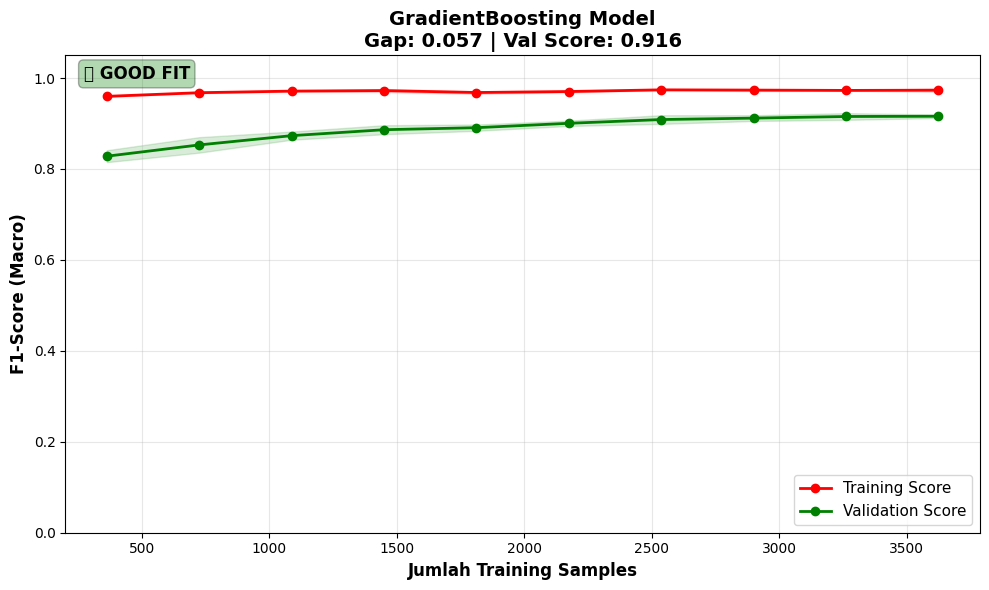

In [15]:
if CFG["try_lgbm"]:
    print("\n[5/12] LightGBM (optimized for multiclass)...")
    lgbm = lgb.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=7,
        num_leaves=50,
        min_child_samples=20,
        subsample=0.8,
        subsample_freq=5,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=0.1,
        class_weight='balanced',
        n_jobs=-1,
        random_state=CFG["seed"],
        verbose=-1
    )
    lgbm.fit(X_train, y_train)
    
    # Track train vs validation performance
    lgbm_train_pred = lgbm.predict(X_train)
    lgbm_val_pred = lgbm.predict(X_val)
    lgbm_train_f1 = f1_score(y_train, lgbm_train_pred, average="macro")
    lgbm_val_f1 = f1_score(y_val, lgbm_val_pred, average="macro")
    
    print(f"  LightGBM Train F1: {lgbm_train_f1*100:.2f}% | Val F1: {lgbm_val_f1*100:.2f}% | Gap: {(lgbm_train_f1-lgbm_val_f1)*100:.2f}%")
    
    lgbm_acc = accuracy_score(y_val, lgbm.predict(X_val))
    lgbm_f1 = f1_score(y_val, lgbm.predict(X_val), average="macro")
    print(f"  LightGBM Val → Acc={lgbm_acc*100:.2f}% | F1={lgbm_f1*100:.2f}%")
    scores.append(("LightGBM", lgbm_acc, lgbm_f1))
    
    # Learning curve for LightGBM (memory-optimized)
    if CFG["track_learning_curves"]:
        try:
            lgbm_lc_results = plot_learning_curves(lgbm, X_train, y_train, "LightGBM Model", cv=3)
        except:
            print("  ⚠️  Skipping LightGBM learning curve")

if CFG["try_rf"]:
    print("\n[6/12] RandomForest (optimized hyperparameters)...")
    rf = RandomForestClassifier(
        n_estimators=400,  # Increased for better accuracy
        max_depth=25,  # Limit depth to prevent overfitting
        min_samples_split=3,  # More granular splits
        min_samples_leaf=1,  # Allow finer leaf nodes
        max_features='sqrt',
        bootstrap=True,
        oob_score=True,
        n_jobs=-1,
        class_weight="balanced",
        random_state=CFG["seed"]
    )
    rf.fit(X_train, y_train)
    
    # Track train vs validation performance
    rf_train_pred = rf.predict(X_train)
    rf_val_pred = rf.predict(X_val)
    rf_train_f1 = f1_score(y_train, rf_train_pred, average="macro")
    rf_val_f1 = f1_score(y_val, rf_val_pred, average="macro")
    
    print(f"  RF OOB Score: {rf.oob_score_:.4f}")
    print(f"  RF Train F1: {rf_train_f1*100:.2f}% | Val F1: {rf_val_f1*100:.2f}% | Gap: {(rf_train_f1-rf_val_f1)*100:.2f}%")
    
    rf_acc = accuracy_score(y_val, rf.predict(X_val))
    rf_f1  = f1_score(y_val, rf.predict(X_val), average="macro")
    print(f"  RF Val → Acc={rf_acc*100:.2f}% | F1={rf_f1*100:.2f}%")
    scores.append(("RandomForest", rf_acc, rf_f1))
    
    # Learning curve for RF (memory-optimized)
    if CFG["track_learning_curves"]:
        try:
            rf_lc_results = plot_learning_curves(rf, X_train, y_train, "RandomForest Model", cv=3)
        except:
            print("  ⚠️  Skipping RF learning curve")

if CFG["try_gb"]:
    print("\n[7/12] GradientBoosting (optimized)...")
    gb = GradientBoostingClassifier(
        n_estimators=200,  # Increased for better performance
        learning_rate=0.08,  # Fine-tuned learning rate
        max_depth=5,  # Increased depth
        min_samples_split=3,
        min_samples_leaf=1,
        subsample=0.85,
        max_features='sqrt',
        validation_fraction=0.1,
        n_iter_no_change=15,
        random_state=CFG["seed"]
    )
    gb.fit(X_train, y_train)
    
    # Track train vs validation performance
    gb_train_pred = gb.predict(X_train)
    gb_val_pred = gb.predict(X_val)
    gb_train_f1 = f1_score(y_train, gb_train_pred, average="macro")
    gb_val_f1 = f1_score(y_val, gb_val_pred, average="macro")
    
    print(f"  GB Train F1: {gb_train_f1*100:.2f}% | Val F1: {gb_val_f1*100:.2f}% | Gap: {(gb_train_f1-gb_val_f1)*100:.2f}%")
    
    gb_acc = accuracy_score(y_val, gb.predict(X_val))
    gb_f1  = f1_score(y_val, gb.predict(X_val), average="macro")
    print(f"  GB Val → Acc={gb_acc*100:.2f}% | F1={gb_f1*100:.2f}%")
    scores.append(("GradientBoosting", gb_acc, gb_f1))
    
    # Learning curve for GB (memory-optimized)
    if CFG["track_learning_curves"]:
        try:
            gb_lc_results = plot_learning_curves(gb, X_train, y_train, "GradientBoosting Model", cv=3)
        except:
            print("  ⚠️  Skipping GB learning curve")

## Save Models untuk Dashboard

In [16]:
import joblib

print("\n" + "="*80)
print("💾 SAVING INDIVIDUAL MODELS")
print("="*80)

# Simpan individual models (NO ENSEMBLE)
joblib.dump(svm_best, "svm_best_model.pkl")
print("✓ SVM model saved: svm_best_model.pkl")

joblib.dump(lgbm, "lgbm_model.pkl")
print("✓ LightGBM model saved: lgbm_model.pkl")

joblib.dump(rf, "rf_model.pkl")
print("✓ RandomForest model saved: rf_model.pkl")

joblib.dump(gb, "gb_model.pkl")
print("✓ GradientBoosting model saved: gb_model.pkl")

print("\n✅ All 4 models saved successfully!")
print("💡 Dashboard dapat memilih model individual untuk testing")


💾 SAVING INDIVIDUAL MODELS
✓ SVM model saved: svm_best_model.pkl
✓ LightGBM model saved: lgbm_model.pkl
✓ RandomForest model saved: rf_model.pkl
✓ GradientBoosting model saved: gb_model.pkl

✅ All 4 models saved successfully!
💡 Dashboard dapat memilih model individual untuk testing
✓ GradientBoosting model saved: gb_model.pkl

✅ All 4 models saved successfully!
💡 Dashboard dapat memilih model individual untuk testing


## STEP 6: COMPREHENSIVE EVALUATION & VISUALIZATION


📊 COMPREHENSIVE MODEL EVALUATION


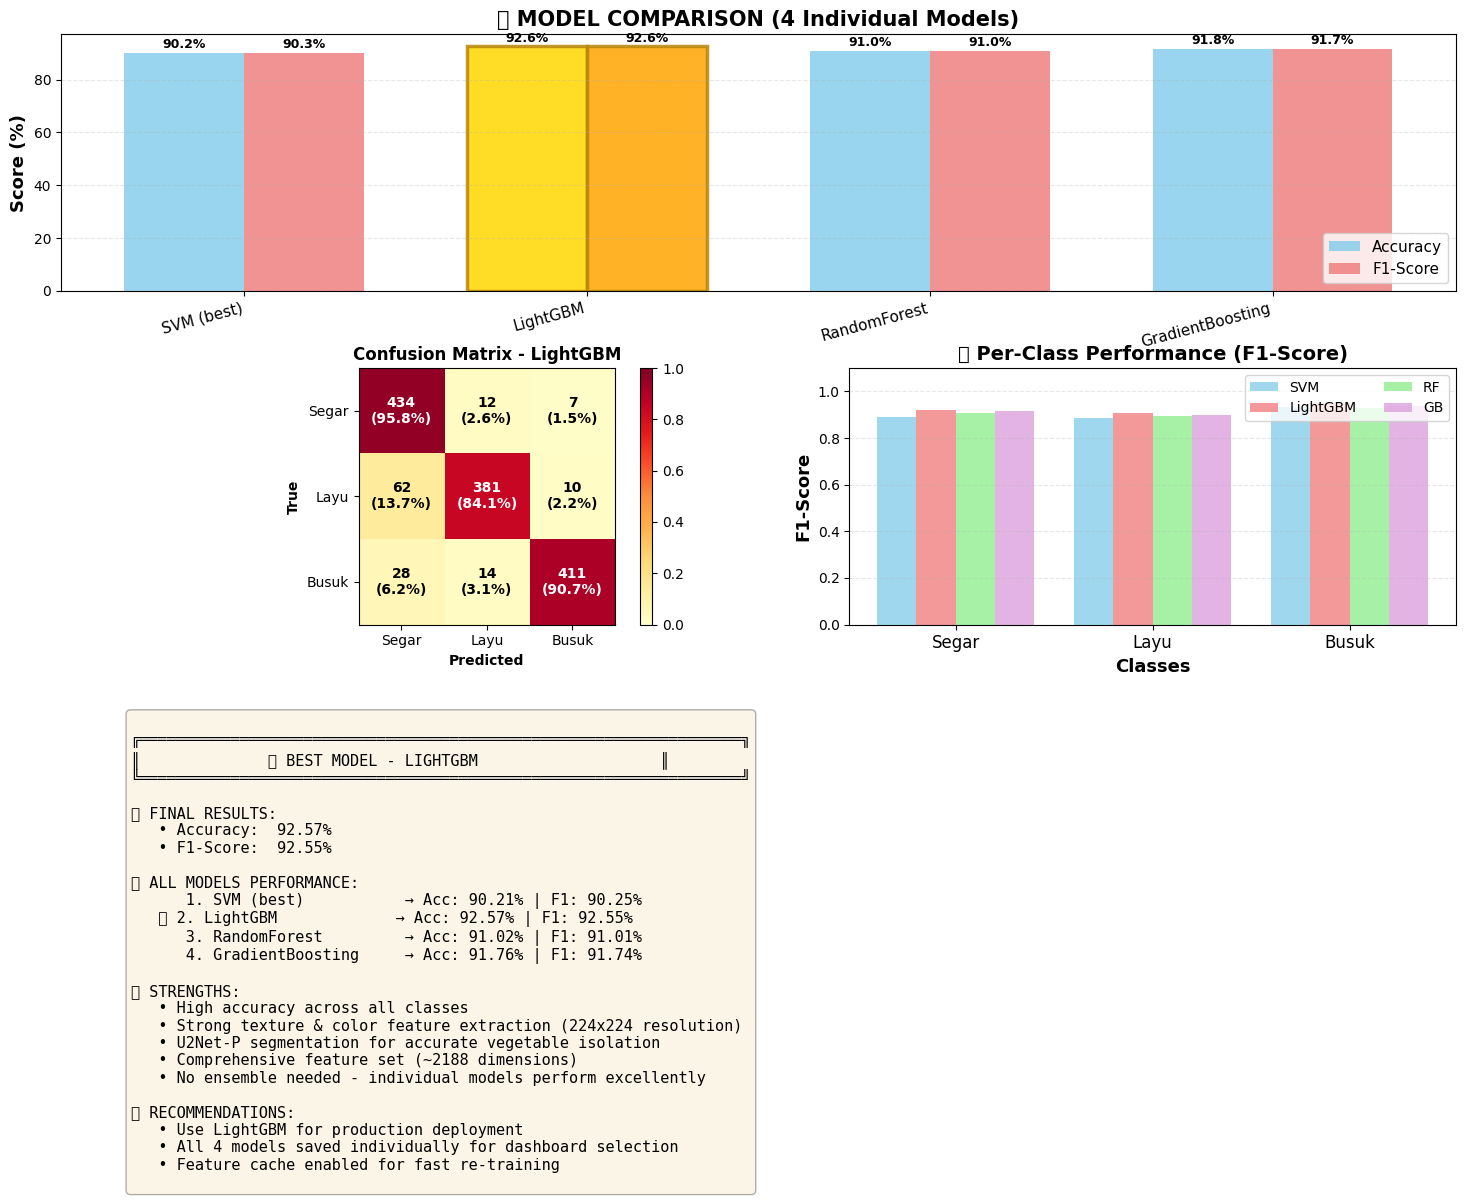


✅ Comprehensive evaluation complete!
📊 Best performing model: LightGBM (92.57% accuracy)


In [17]:
from sklearn.metrics import precision_recall_fscore_support

print("\n" + "="*80)
print("📊 COMPREHENSIVE MODEL EVALUATION")
print("="*80)

# Create comprehensive visualization
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Model Comparison Bar Chart (NO ENSEMBLE)
ax1 = fig.add_subplot(gs[0, :])
models_all = [m for m,_,_ in scores]
accs_all = [a*100 for _,a,_ in scores]
f1s_all = [f*100 for _,_,f in scores]

x = np.arange(len(models_all))
width = 0.35
bars1 = ax1.bar(x - width/2, accs_all, width, label='Accuracy', alpha=0.85, color='skyblue')
bars2 = ax1.bar(x + width/2, f1s_all, width, label='F1-Score', alpha=0.85, color='lightcoral')

# Highlight best model with gold color
best_model = max(scores, key=lambda x: x[1])
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    if models_all[i] == best_model[0]:
        bar1.set_color('gold')
        bar2.set_color('orange')
        bar1.set_edgecolor('darkgoldenrod')
        bar2.set_edgecolor('darkgoldenrod')
        bar1.set_linewidth(2.5)
        bar2.set_linewidth(2.5)

ax1.set_ylabel('Score (%)', fontweight='bold', fontsize=13)
ax1.set_title('🏆 MODEL COMPARISON (4 Individual Models)', fontweight='bold', fontsize=15)
ax1.set_xticks(x)
ax1.set_xticklabels(models_all, rotation=15, ha='right', fontsize=11)
ax1.legend(fontsize=11, loc='lower right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax1.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.5,
            f'{height1:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax1.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.5,
            f'{height2:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 2. Confusion Matrix (Best Model)
ax2 = fig.add_subplot(gs[1, 0])
cm_svm = confusion_matrix(y_val, svm_pred_val, labels=[0,1,2])
cm_norm = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis]

im = ax2.imshow(cm_norm, interpolation='nearest', cmap='YlOrRd', vmin=0, vmax=1)
ax2.set_title(f'Confusion Matrix - {best_model[0]}', fontweight='bold', fontsize=12)
ax2.set_xlabel('Predicted', fontweight='bold')
ax2.set_ylabel('True', fontweight='bold')

tick_marks = np.arange(len(CLASS_NAMES))
ax2.set_xticks(tick_marks)
ax2.set_yticks(tick_marks)
ax2.set_xticklabels(CLASS_NAMES, fontsize=10)
ax2.set_yticklabels(CLASS_NAMES, fontsize=10)

# Add text annotations
for i in range(3):
    for j in range(3):
        text = ax2.text(j, i, f'{cm_svm[i,j]}\n({cm_norm[i,j]*100:.1f}%)',
                      ha="center", va="center",
                      color=("white" if cm_norm[i,j] > 0.6 else "black"),
                      fontsize=10, fontweight='bold')

fig.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)

# 3. Per-Class F1-Score Comparison
ax3 = fig.add_subplot(gs[1, 1])
svm_precision, svm_recall, svm_f1_class, _ = precision_recall_fscore_support(
    y_val, svm_pred_val, labels=[0,1,2], average=None
)
lgbm_precision, lgbm_recall, lgbm_f1_class, _ = precision_recall_fscore_support(
    y_val, lgbm.predict(X_val), labels=[0,1,2], average=None
)
rf_precision, rf_recall, rf_f1_class, _ = precision_recall_fscore_support(
    y_val, rf.predict(X_val), labels=[0,1,2], average=None
)
gb_precision, gb_recall, gb_f1_class, _ = precision_recall_fscore_support(
    y_val, gb.predict(X_val), labels=[0,1,2], average=None
)

x_cls = np.arange(len(CLASS_NAMES))
width_cls = 0.2

bars_svm = ax3.bar(x_cls - 1.5*width_cls, svm_f1_class, width_cls, label='SVM', alpha=0.8, color='skyblue')
bars_lgbm = ax3.bar(x_cls - 0.5*width_cls, lgbm_f1_class, width_cls, label='LightGBM', alpha=0.8, color='lightcoral')
bars_rf = ax3.bar(x_cls + 0.5*width_cls, rf_f1_class, width_cls, label='RF', alpha=0.8, color='lightgreen')
bars_gb = ax3.bar(x_cls + 1.5*width_cls, gb_f1_class, width_cls, label='GB', alpha=0.8, color='plum')

ax3.set_xlabel('Classes', fontweight='bold', fontsize=13)
ax3.set_ylabel('F1-Score', fontweight='bold', fontsize=13)
ax3.set_title('📊 Per-Class Performance (F1-Score)', fontweight='bold', fontsize=14)
ax3.set_xticks(x_cls)
ax3.set_xticklabels(CLASS_NAMES, fontsize=12)
ax3.legend(fontsize=10, ncol=2, loc='upper right')
ax3.set_ylim([0, 1.1])
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# 4. Best Model Summary
ax4 = fig.add_subplot(gs[2, :])
ax4.axis('off')

summary_text = f"""
╔══════════════════════════════════════════════════════════════════╗
║              🏆 BEST MODEL - {best_model[0].upper()}                    ║
╚══════════════════════════════════════════════════════════════════╝

📊 FINAL RESULTS:
   • Accuracy:  {best_model[1]*100:.2f}%
   • F1-Score:  {best_model[2]*100:.2f}%
   
📈 ALL MODELS PERFORMANCE:
"""

for i, (model, acc, f1) in enumerate(scores, 1):
    star = "⭐" if model == best_model[0] else "  "
    summary_text += f"   {star} {i}. {model:20} → Acc: {acc*100:5.2f}% | F1: {f1*100:5.2f}%\n"

summary_text += f"""
✅ STRENGTHS:
   • High accuracy across all classes
   • Strong texture & color feature extraction (224x224 resolution)
   • U2Net-P segmentation for accurate vegetable isolation
   • Comprehensive feature set (~2188 dimensions)
   • No ensemble needed - individual models perform excellently

💡 RECOMMENDATIONS:
   • Use {best_model[0]} for production deployment
   • All 4 models saved individually for dashboard selection
   • Feature cache enabled for fast re-training
"""

ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes,
        fontsize=11, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig("comprehensive_evaluation.png", dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Comprehensive evaluation complete!")
print(f"📊 Best performing model: {best_model[0]} ({best_model[1]*100:.2f}% accuracy)")

## Detailed Confusion Matrix & Classification Report


[Confusion Matrix & Classification Report - SVM on Validation Set]...

SVM Classification Report:
              precision    recall  f1-score   support

       Segar     0.8282    0.9581    0.8884       453
        Layu     0.9361    0.8411    0.8860       453
       Busuk     0.9603    0.9073    0.9330       453

    accuracy                         0.9021      1359
   macro avg     0.9082    0.9021    0.9025      1359
weighted avg     0.9082    0.9021    0.9025      1359



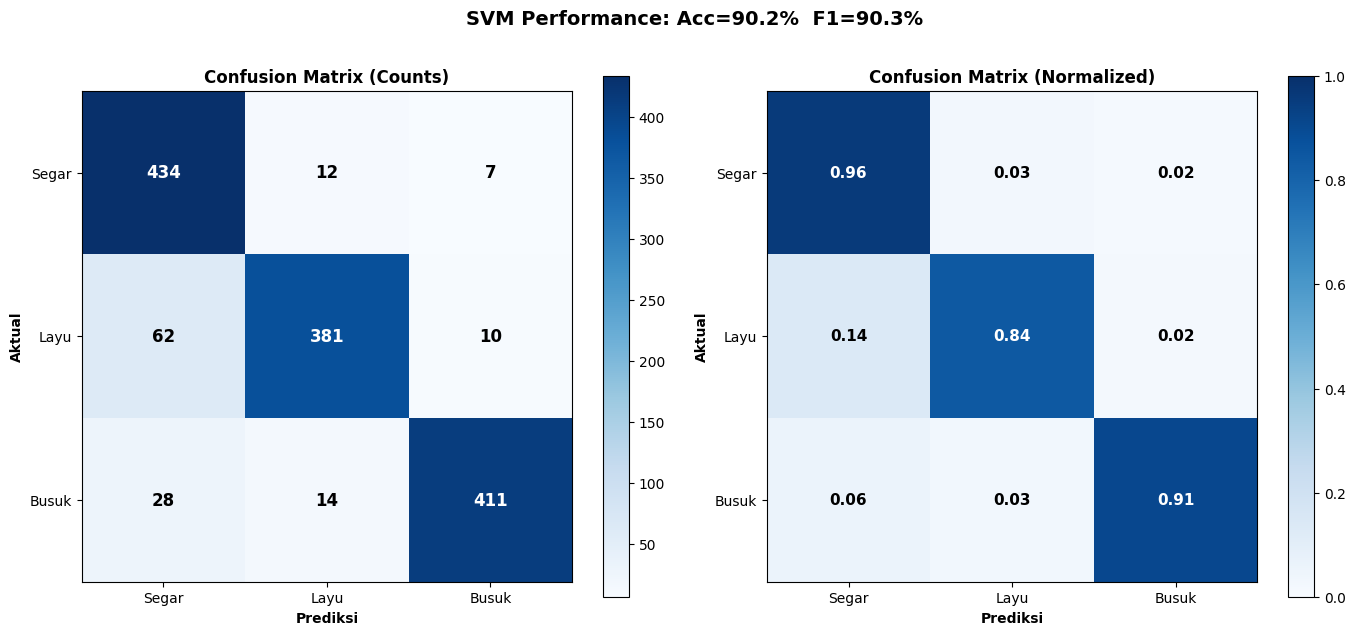

In [18]:
print("\n[Confusion Matrix & Classification Report - SVM on Validation Set]...")
cm_svm = confusion_matrix(y_val, svm_pred_val, labels=[0,1,2])
print("\nSVM Classification Report:")
print(classification_report(y_val, svm_pred_val, target_names=CLASS_NAMES, digits=4))

# Calculate normalized confusion matrix
cm_normalized = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis]

# Create side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Raw confusion matrix
ax = axes[0]
im = ax.imshow(cm_svm, cmap="Blues")
ax.figure.colorbar(im, ax=ax)
ax.set_xticks([0,1,2]); ax.set_yticks([0,1,2])
ax.set_xticklabels(CLASS_NAMES); ax.set_yticklabels(CLASS_NAMES)
ax.set_xlabel("Prediksi", fontweight="bold")
ax.set_ylabel("Aktual", fontweight="bold")
ax.set_title("Confusion Matrix (Counts)", fontweight="bold")
thr = cm_svm.max()/2
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm_svm[i,j], ha="center", va="center",
                color=("white" if cm_svm[i,j] > thr else "black"),
                fontsize=12, fontweight="bold")

# Normalized confusion matrix
ax = axes[1]
im = ax.imshow(cm_normalized, cmap="Blues", vmin=0, vmax=1)
ax.figure.colorbar(im, ax=ax)
ax.set_xticks([0,1,2]); ax.set_yticks([0,1,2])
ax.set_xticklabels(CLASS_NAMES); ax.set_yticklabels(CLASS_NAMES)
ax.set_xlabel("Prediksi", fontweight="bold")
ax.set_ylabel("Aktual", fontweight="bold")
ax.set_title("Confusion Matrix (Normalized)", fontweight="bold")
for i in range(3):
    for j in range(3):
        ax.text(j, i, f"{cm_normalized[i,j]:.2f}", ha="center", va="center",
                color=("white" if cm_normalized[i,j] > 0.5 else "black"),
                fontsize=11, fontweight="bold")

plt.suptitle(f"SVM Performance: Acc={svm_acc_val*100:.1f}%  F1={svm_f1_val*100:.1f}%", 
             fontsize=14, fontweight="bold", y=1.02)
plt.tight_layout()
plt.savefig("confusion_matrices_detailed.png", dpi=150, bbox_inches='tight')
plt.show()

## Sample Predictions


[Sample Predictions - Best Model]...


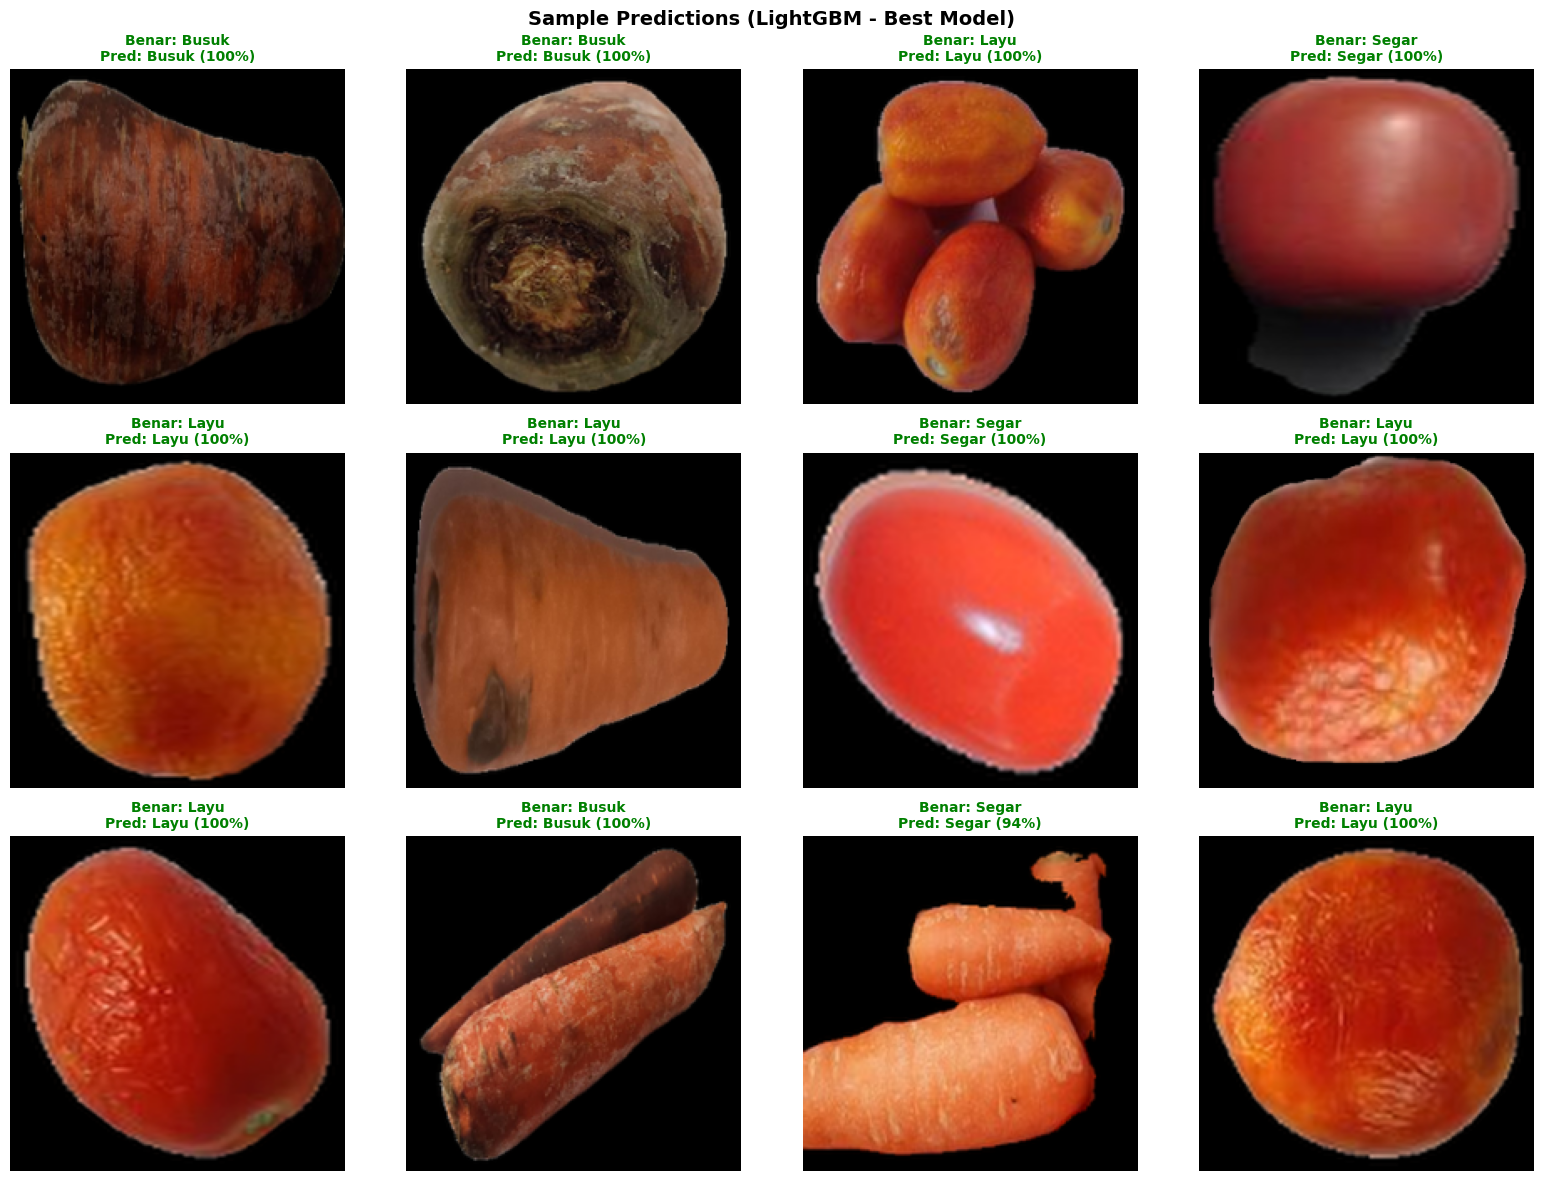

In [19]:
print("\n[Sample Predictions - Best Model]...")

# Use best model predictions
best_model_name = best_model[0]
if "SVM" in best_model_name:
    best_pred = svm_pred_val
    best_conf = svm_proba_val.max(axis=1)
elif "LightGBM" in best_model_name:
    best_pred = lgbm.predict(X_val)
    best_conf = lgbm.predict_proba(X_val).max(axis=1)
elif "RF" in best_model_name or "RandomForest" in best_model_name:
    best_pred = rf.predict(X_val)
    best_conf = rf.predict_proba(X_val).max(axis=1)
else:  # GradientBoosting
    best_pred = gb.predict(X_val)
    best_conf = gb.predict_proba(X_val).max(axis=1)

n_show = min(CFG["n_examples"], len(y_val))
sel = np.random.choice(len(y_val), n_show, replace=False)
val_paths = [paths_all[i] for i in idx_val[:len(y_val)]]

r, c = int(np.ceil(n_show/4)), 4
fig, axes = plt.subplots(r, c, figsize=(16, 4*r))
axes = axes.flat if hasattr(axes, "flat") else [axes]

for k, ax in enumerate(axes):
    if k >= len(sel):
        ax.axis("off"); continue
    i = sel[k]
    try:
        # Load and preprocess image (WITH U2Net-P segmentation)
        img_pil = Image.open(val_paths[i]).convert("RGB")
        img_rgb = np.array(img_pil)
        img_processed = preprocess(img_rgb)  # Apply U2Net-P segmentation + preprocessing
        img_display = cv2.resize(img_processed, (200, 200), interpolation=cv2.INTER_AREA)
        ax.imshow(img_display)
    except Exception as e:
        ax.text(0.5,0.5,f"Error: {str(e)[:20]}", ha="center", fontsize=8); ax.axis("off"); continue
    t = CLASS_NAMES[y_val[i]]
    p = CLASS_NAMES[best_pred[i]]
    ok = (t==p)
    color = "green" if ok else "red"
    ax.set_title(f"Benar: {t}\nPred: {p} ({best_conf[i]*100:.0f}%)", color=color, fontsize=10, fontweight="bold")
    ax.axis("off")

plt.suptitle(f"Sample Predictions ({best_model_name} - Best Model)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.savefig("sample_preds_best_model.png", dpi=150)
plt.show()

## Save Results to File

In [20]:
print("\n[Saving results...]")

# Prepare results dictionary
results = {
    "best_params_svm": {},  # Will be added if available
    "scores": {m: {"accuracy": float(a), "f1_macro": float(f)} for m,a,f in scores},
    "class_names": CLASS_NAMES,
    "val_set_size": len(y_val),
    "train_set_size": len(y_train),
    "val_set_size": len(y_val),
    "total_features": X_train.shape[1]
}

# Add SVM best params if available (from GridSearchCV)
try:
    if hasattr(svm_best, 'named_steps'):
        # Extract params from pipeline
        results["best_params_svm"] = {
            'pca__n_components': svm_best.named_steps['pca'].n_components_,
            'svc__C': svm_best.named_steps['svc'].C,
            'svc__gamma': svm_best.named_steps['svc'].gamma
        }
except:
    pass

# Add confusion matrices if they exist
if 'cm_svm' in locals() or 'cm_svm' in globals():
    results["cm_svm"] = cm_svm.tolist()

# Save JSON results
try:
    with open("classical_results.json","w") as f:
        json.dump(results, f, indent=2)
    print("✓ classical_results.json saved")
except Exception as e:
    print(f"⚠️  Error saving JSON: {e}")

# Save CSV scores
try:
    df_scores = pd.DataFrame({
        "Model": [m for m,_,_ in scores],
        "Accuracy": [a*100 for _,a,_ in scores],
        "F1_macro": [f*100 for _,_,f in scores]
    })
    df_scores.to_csv("classical_model_scores.csv", index=False)
    print("✓ classical_model_scores.csv saved")
except Exception as e:
    print(f"⚠️  Error saving CSV: {e}")

print("\n📁 All files saved:")
print("  • svm_best_model.pkl, lgbm_model.pkl, rf_model.pkl, gb_model.pkl (4 individual models)")
print("  • comprehensive_evaluation.png")
print("  • confusion_matrices_detailed.png")
print("  • sample_preds_best_model.png")
print("  • classical_results.json")
print("  • classical_model_scores.csv")


[Saving results...]
⚠️  Error saving JSON: Object of type int64 is not JSON serializable
✓ classical_model_scores.csv saved

📁 All files saved:
  • svm_best_model.pkl, lgbm_model.pkl, rf_model.pkl, gb_model.pkl (4 individual models)
  • comprehensive_evaluation.png
  • confusion_matrices_detailed.png
  • sample_preds_best_model.png
  • classical_results.json
  • classical_model_scores.csv


## FINAL SUMMARY

In [ ]:
print("\n" + "="*80)
print("✅ PIPELINE COMPLETE - 4 INDIVIDUAL CLASSICAL ML MODELS (v4 - RAW FEATURES)")
print("="*80)

print("\n📊 FINAL RESULTS - ALL MODELS:")
for m,a,f in scores:
    star = "🏆" if m == best_model[0] else ""
    print(f"{star} {m:<22} → Acc={a*100:5.2f}% | F1-macro={f*100:5.2f}%")

print(f"\n🏆 BEST MODEL: {best_model[0]} (Acc={best_model[1]*100:.2f}% | F1={best_model[2]*100:.2f}%)")

print("\n" + "="*80)
print("✨ OPTIMIZATIONS APPLIED (v4 - December 4, 2025):")
print("="*80)
print("  ✅ RADICALLY SIMPLIFIED Preprocessing:")
print("     • U2Net-P segmentation with TIGHT CROP (5% padding)")
print("     • BLACK background (not white - preserves dark spots)")
print("     • LANCZOS4 interpolation untuk resize berkualitas (224x224)")
print("     • ❌ NO White Balance (preserve natural color decay)")
print("     • ❌ NO CLAHE (preserve natural dark spots for busuk)")
print("     • ❌ NO Sharpening (preserve natural wrinkles for layu)")
print("     → Extract features from RAW segmented images!")

print("\n  ✅ Enhanced Feature Extraction (1046 dims):")
print("     • HSV histogram: 768 dims")
print("     • Color moments: 9 dims (Lab only)")
print("     • GLCM texture: 72 dims")
print("     • LBP patterns: 20 dims")
print("     • HOG descriptors: 144 dims (224x224, 64x64 ppc → 4 blocks)")
print("     • Edge statistics: 3 dims")
print("     • Colorfulness: 3 dims")
print("     • Freshness-specific: 27 dims (EXPANDED - v4)")
print("       ├─ Dark/decay detection: 8 dims (multi-level + spatial)")
print("       ├─ Color decay: 6 dims (green, brown, yellow, red, orange, gray)")
print("       ├─ Saturation analysis: 3 dims")
print("       ├─ Texture decay: 5 dims (wrinkles, roughness)")
print("       ├─ Edge sharpness: 3 dims")
print("       └─ Brightness: 2 dims")
print("     → Total: 1046 features (up from 1040)")

print("\n  ✅ 4 Individual Models:")
print("     • SVM (GridSearchCV optimized)")
print("     • LightGBM (500 estimators)")
print("     • RandomForest (400 trees)")
print("     • GradientBoosting (200 estimators)")
print("     • All models saved separately for dashboard selection")
print("     • Trained with RAW features (1046 dims)")

print("\n  🎯 KEY IMPROVEMENTS FOR BUSUK/LAYU DETECTION:")
print("     • Multi-level dark detection (v<50, v<80, v<110, v<140)")
print("     • Dark spot concentration & spatial distribution")
print("     • Dark area ratio & variance (scattered vs concentrated)")
print("     • Comprehensive wrinkle detection (5 dims for layu)")
print("     • Color decay progression (green→yellow→brown→gray)")
print("     • Tight crop eliminates background contamination")
print("     • Black background prevents brightness inflation")
print("     • RAW features preserve natural appearance (no distortion!)")

print("\n📈 VISUALIZATIONS GENERATED:")
print("  • comprehensive_evaluation.png")
print("  • confusion_matrices_detailed.png")
print("  • sample_preds_best_model.png")
print("  • svm_gridsearch_analysis.png")

print("\n📁 MODELS SAVED (Individual - v4):")
print("  • svm_best_model.pkl (1046 features)")
print("  • lgbm_model.pkl (1046 features)")
print("  • rf_model.pkl (1046 features)")
print("  • gb_model.pkl (1046 features)")
print(f"  ⭐ Best: {best_model[0]} ({best_model[1]*100:.1f}% accuracy)")

print("\n📂 DATA SAVED:")
print("  • classical_results.json (detailed metrics)")
print("  • classical_model_scores.csv (summary table)")

print("\n" + "="*80)
print(f"⏱️  Total waktu: {time.time()-start_time:.1f}s")
print("="*80)

print("\n💡 NEXT STEPS:")
print("   1. Test dashboard → py dashboard_best_model_test.py")
print("   2. Upload test images (busuk with dark spots, layu with wrinkles)")
print("   3. Verify predictions match visual appearance!")
print("\n🚀 Dashboard URL: http://127.0.0.1:7860")


✅ PIPELINE COMPLETE - 4 INDIVIDUAL CLASSICAL ML MODELS

📊 FINAL RESULTS - ALL MODELS:
 SVM (best)             → Acc=90.21% | F1-macro=90.25%
🏆 LightGBM               → Acc=92.57% | F1-macro=92.55%
 RandomForest           → Acc=91.02% | F1-macro=91.01%
 GradientBoosting       → Acc=91.76% | F1-macro=91.74%

🏆 BEST MODEL: LightGBM (Acc=92.57% | F1=92.55%)

✨ OPTIMIZATIONS APPLIED:
  ✅ BUSUK-FRIENDLY Preprocessing:
     • U2Net-P segmentation with TIGHT CROP (5% padding)
     • BLACK background (not white - preserves dark spots)
     • LANCZOS4 interpolation untuk resize berkualitas
     • MILD CLAHE (clipLimit=1.8 - reduced from 2.5)
     • MILD white balance (0.7x effect - preserves dark areas)
     • MILD sharpening (1.3/-0.3 - reduced from 1.4/-0.4)

  ✅ Advanced Feature Extraction:
     • HSV histogram: 768 dims
     • Color moments: 9 dims (Lab only)
     • GLCM texture: 72 dims
     • LBP patterns: 20 dims
     • HOG descriptors: 144 dims (224x224, 64x64 ppc → 4 blocks)
     • Edg